**Problem 1:**

---



You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.
  
**Data Ingestion: 12 marks**
1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. (5 Marks)
2. Perform Univariate and Bivariate Analysis.
Do exploratory data analysis.
Check for Outliers. (7 Marks)
**Data Preparation: 5 marks**
1. Encode the data (having string values) for Modelling.
Is Scaling necessary here or not?
Data Split: Split the data into train and test (70:30). (5 Marks)
**Modelling: 26 marks**
1. Apply Logistic Regression and LDA (linear discriminant analysis). (5 marks)
2. Apply KNN Model, Naïve Bayes Model and support vector machine (SVM) model. Interpret the results. (7 marks)
3. Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting. (7 marks)
4. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model.

Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

**Inference: 5 marks**
1. Based on these predictions, what are the insights? (5 marks)
---

# **Data Ingestion: 12 marks**




## *Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. (5 Marks)*

In [4]:
#import necessary packages
import pandas as pd
import numpy as np

***Read the dataset and displaying the top 5 entries***

In [5]:
data=pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)
data.head(5)

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
1  Labour   43                       3                        3      4      1   
2  Labour   36                       4                        4      4      4   
3  Labour   35                       4                        4      5      2   
4  Labour   24                       4                        2      2      1   
5  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
1       2                    2  female  
2       5                    2    male  
3       3                    2    male  
4       4                    0  female  
5       6                    2    male



---


***Checking the attributes and size of the dataset***

In [6]:
print("COLUMNS/FEATURES:\n\n",data.columns)
print("\nSIZE OF THE DATASET:",data.shape)

COLUMNS/FEATURES:

 Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

SIZE OF THE DATASET: (1525, 9)


**INFERENCE**

**So in the given dataset there are 10 attributes (columns/features) with 1525 entries**

---



***Displaying the top 5 entries of the dataset after dropping the column***

In [7]:
data.head(5)

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
1  Labour   43                       3                        3      4      1   
2  Labour   36                       4                        4      4      4   
3  Labour   35                       4                        4      5      2   
4  Labour   24                       4                        2      2      1   
5  Labour   41                       2                        2      1      1   

   Europe  political.knowledge  gender  
1       2                    2  female  
2       5                    2    male  
3       3                    2    male  
4       4                    0  female  
5       6                    2    male

***Checking the attributes and size of the dataset***

In [8]:
print("COLUMNS/FEATURES:\n\n",data.columns)
print("\nSIZE OF THE DATASET:",data.shape)

COLUMNS/FEATURES:

 Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

SIZE OF THE DATASET: (1525, 9)


**INFERENCE:**

**So in the given dataset there are 9 attributes (columns/features) with 1525 entries**

---



***Renaming the attributes name having . with _ and displaying the top 5 entries***

In [9]:
dict = {'economic.cond.national': 'economic_cond_national',
        'economic.cond.household': 'economic_cond_household',
        'political.knowledge': 'political_knowledge'}
data.rename(columns=dict,
          inplace=True)
data.head(5)

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
1  Labour   43                       3                        3      4      1   
2  Labour   36                       4                        4      4      4   
3  Labour   35                       4                        4      5      2   
4  Labour   24                       4                        2      2      1   
5  Labour   41                       2                        2      1      1   

   Europe  political_knowledge  gender  
1       2                    2  female  
2       5                    2    male  
3       3                    2    male  
4       4                    0  female  
5       6                    2    male

***Checking the attributes and size of the dataset***

In [10]:
print("COLUMNS/FEATURES:\n\n",data.columns)
print("\nSIZE OF THE DATASET:",data.shape)

COLUMNS/FEATURES:

 Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

SIZE OF THE DATASET: (1525, 9)


**So in the given dataset there are 9 attributes (columns/features) with 1525 entries**

---



***Using info() method to print information like the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values) about the DataFrame.***

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   int64 
 3   economic_cond_household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political_knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


**INFERENCE:**


**So here totally there are 9 attributes(columns) where,**

* 2 of the attributes :vote and gender are of object datatype (i.e) categorical variables
*   Remaining 7 : age, economic_cond_national, economic_cond_household,Blair ,Hague,Europe, political_knowledge are of int64 datatype (i.e) numerical variables **



---


### ***Checking for null values***

*isnull(). sum() returns the number of missing values for each attribute in the dataset.*


In [12]:
data.isnull().sum()

vote                       0
age                        0
economic_cond_national     0
economic_cond_household    0
Blair                      0
Hague                      0
Europe                     0
political_knowledge        0
gender                     0
dtype: int64

**INFERENCE:**

***We can see that there are no null values in the dataset***



---


## ***DESCRIPTIVE STATISTICS***

The primary goal of descriptive statistics is to provide a clear and concise summary of the data, enabling researchers or analysts to gain insights and understand patterns, trends, and distributions within the dataset.

 This summary typically includes measures such as
* central tendency (e.g., mean, median, mode),
* dispersion (e.g., range, variance, standard deviation), and
* shape of the distribution (e.g., skewness, kurtosis).

In [13]:
#mode
data.mode()

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
0  Labour   37                       3                        3      4      2   

   Europe  political_knowledge  gender  
0      11                    2  female

**INFERENCE:**

* Mode is the one that have higher frequency of occurence .

* So here based on the above result we can understand that ,
age : 37 which means that 37 has occured many times in the dataset.

* So we can infer that many voters are at the age of 37.

* Similary for other attributes the highest frequency of occurence of each attribute is displayed.

In [14]:
#median
data.median()

<ipython-input-14-fc4c07388ce0>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


age                        53.0
economic_cond_national      3.0
economic_cond_household     3.0
Blair                       4.0
Hague                       2.0
Europe                      6.0
political_knowledge         2.0
dtype: float64

**INFERENCE:**

 * Median is the value separating the higher half from the lower half of a data sample or a population.

* So here the middle values of each attribute is displayed.

In [15]:
data.groupby('gender').mean()

<ipython-input-15-906c82ffe320>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('gender').mean()


age  economic_cond_national  economic_cond_household     Blair  \
gender                                                                         
female  54.472906                3.200739                 3.110837  3.257389   
male    53.851332                3.297335                 3.173913  3.422160   

           Hague   Europe  political_knowledge  
gender                                          
female  2.780788  6.96798             1.381773  
male    2.708275  6.45582             1.725105

**INFERENCE:**

* Here grouping the data based on gender by calculating the average(mean) value of each attribute.

* Here we can infer that the average of attributes age,Blair,Europe of female is higher than male.


In [16]:
data.groupby('gender').median()

<ipython-input-16-1486a854fea5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('gender').median()


age  economic_cond_national  economic_cond_household  Blair  Hague  \
gender                                                                        
female  54.0                     3.0                      3.0    4.0    2.0   
male    53.0                     3.0                      3.0    4.0    2.0   

        Europe  political_knowledge  
gender                               
female     7.0                  2.0  
male       6.0                  2.0

In [17]:
data.groupby('vote').mean()

<ipython-input-17-d7f032be2b21>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('vote').mean()


age  economic_cond_national  economic_cond_household  \
vote                                                                       
Conservative  56.870130                2.844156                 2.893939   
Labour        53.014111                3.420508                 3.247413   

                 Blair     Hague    Europe  political_knowledge  
vote                                                             
Conservative  2.573593  3.621212  8.655844             1.720779  
Labour        3.665099  2.366886  5.890875             1.464722

In [18]:
data.groupby('vote').median()

<ipython-input-18-afe2d4dc831b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('vote').median()


age  economic_cond_national  economic_cond_household  Blair  \
vote                                                                         
Conservative  58.0                     3.0                      3.0    2.0   
Labour        51.0                     3.0                      3.0    4.0   

              Hague  Europe  political_knowledge  
vote                                              
Conservative    4.0     9.0                  2.0  
Labour          2.0     6.0                  2.0

In [19]:
data.groupby(['vote','gender']).mean()

age  economic_cond_national  \
vote         gender                                      
Conservative female  58.293436                2.853282   
             male    55.054187                2.832512   
Labour       female  52.683544                3.363472   
             male    53.372549                3.482353   

                     economic_cond_household     Blair     Hague    Europe  \
vote         gender                                                          
Conservative female                 2.895753  2.583012  3.567568  8.559846   
             male                   2.891626  2.561576  3.689655  8.778325   
Labour       female                 3.211573  3.573237  2.412297  6.222423   
             male                   3.286275  3.764706  2.317647  5.531373   

                     political_knowledge  
vote         gender                       
Conservative female             1.648649  
             male               1.812808  
Labour       female             1.256781  
             male               1.690196

In [20]:
data.groupby(['vote','gender']).median()

age  economic_cond_national  economic_cond_household  \
vote         gender                                                          
Conservative female  59.0                     3.0                      3.0   
             male    55.0                     3.0                      3.0   
Labour       female  51.0                     3.0                      3.0   
             male    51.0                     4.0                      3.0   

                     Blair  Hague  Europe  political_knowledge  
vote         gender                                             
Conservative female    2.0    4.0     9.0                  2.0  
             male      2.0    4.0     9.0                  2.0  
Labour       female    4.0    2.0     6.0                  2.0  
             male      4.0    2.0     5.0                  2.0

**INFERENCE:**

* From the above two results we can infer that the age of female to vote for conservative is higher when compared to male.

* Where as age of male to vote for labour is higher.



---


**NUMERICAL COLUMNS**

The describe() method returns description of the data in the DataFrame.

The description contains these information for each column:

* count: Total Number of Non-Empty values
* mean: Mean of the column values
* std: Standard Deviation of the column values
* min: Minimum value from the column
* 25%: 25 percentile
* 50%: 50 percentile
* 75%: 75 percentile
* max: Maximum value from the column

In [21]:
data.describe().T

count       mean        std   min   25%   50%   75%  \
age                      1525.0  54.182295  15.711209  24.0  41.0  53.0  67.0   
economic_cond_national   1525.0   3.245902   0.880969   1.0   3.0   3.0   4.0   
economic_cond_household  1525.0   3.140328   0.929951   1.0   3.0   3.0   4.0   
Blair                    1525.0   3.334426   1.174824   1.0   2.0   4.0   4.0   
Hague                    1525.0   2.746885   1.230703   1.0   2.0   2.0   4.0   
Europe                   1525.0   6.728525   3.297538   1.0   4.0   6.0  10.0   
political_knowledge      1525.0   1.542295   1.083315   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic_cond_national    5.0  
economic_cond_household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political_knowledge       3.0

**CATEGORICAL COLUMNS**

describe(includes=['object']) will calculate count, unique, top and freq for every categroical variable.

In [22]:
data.describe(include=['object']).T

count unique     top  freq
vote    1525      2  Labour  1063
gender  1525      2  female   812

**INFERENCE:**

Here,

VOTE:

* count: There are 1525 values.
* unique: There are 2  unique values (i.e) Labour,Conservative
* top: The “top” value (i.e. highest in the alphabet) is Labour.
* freq: This top value occurs 1063 times.

GENDER:

* count: There are 1525 values.
* unique: There are 2  unique values (i.e) Male,Female
* top: The “top” value (i.e. highest in the alphabet) is Female.
* freq: This top value occurs 812 times.


---



**Skewness** is a way of estimating and measuring the shape of a distribution. It is a vital statistical method for estimating asymmetrical behavior rather than computing the frequency distribution. Its value can be either positive or negative.



In [23]:
data.skew()

<ipython-input-23-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


age                        0.144621
economic_cond_national    -0.240453
economic_cond_household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political_knowledge       -0.426838
dtype: float64

**INFERENCE:**

* so here there are 2 positively skewed attributes: age and Hague which is right tailed (i.e)mode<median<mean

* remaining are negatively skewed which is left tailed (i.e) mean<median<mode



---


The **coefficient of variation (CV)** is the ratio of the standard deviation to the mean. The higher the coefficient of variation, the greater the level of dispersion around the mean.


In [24]:
numeric_data = data.select_dtypes(include='number')

# Calculate the coefficient of variation for each numeric attribute
cv_values = (numeric_data.std() / numeric_data.mean())

# Print the CV values for each attribute
print("Coefficient of Variation (CV) for Numeric Attributes:")
print(cv_values)


Coefficient of Variation (CV) for Numeric Attributes:
age                        0.289969
economic_cond_national     0.271410
economic_cond_household    0.296132
Blair                      0.352332
Hague                      0.448036
Europe                     0.490083
political_knowledge        0.702404
dtype: float64


**INFERENCE:**

* Here political knowledge is likely to have high CV when compared with other attributes

### ***Checking duplicates***

In [25]:
dups=data.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
data[dups]

Total no of duplicate values = 8


vote  age  economic_cond_national  economic_cond_household  \
68          Labour   35                       4                        4   
627         Labour   39                       3                        4   
871         Labour   38                       2                        4   
984   Conservative   74                       4                        3   
1155  Conservative   53                       3                        4   
1237        Labour   36                       3                        3   
1245        Labour   29                       4                        4   
1439        Labour   40                       4                        3   

      Blair  Hague  Europe  political_knowledge  gender  
68        5      2       3                    2    male  
627       4      2       5                    2    male  
871       2      2       4                    3    male  
984       2      4       8                    2  female  
1155      2      2       6                    0  female  
1237      2      2       6                    2  female  
1245      4      2       2                    2  female  
1439      4      2       2                    2    male

**INFERENCE:**

We cannot clearly say that these votes are from same or different person so we keep these data instead of removing it



---
# *Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)*



## *UNIVARIATE ANALYSIS*

In [26]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

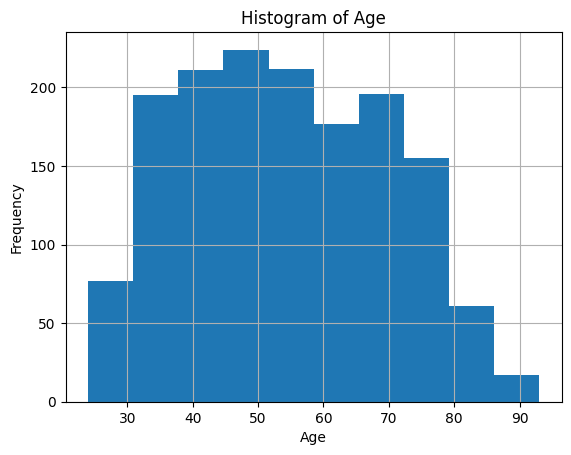

In [27]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [28]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

3    607
4    542
2    257
5     82
1     37
Name: economic_cond_national, dtype: int64


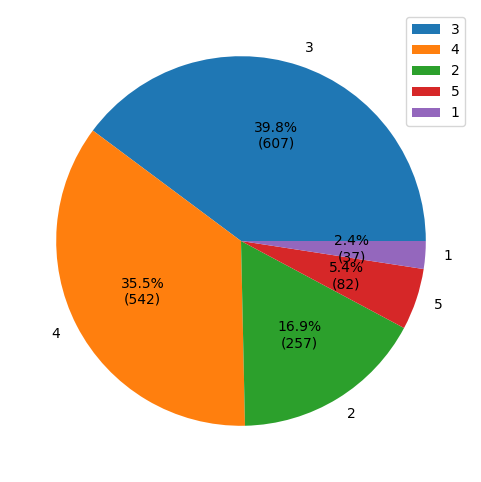

In [29]:
s=(data["economic_cond_national"].value_counts())
print(s)
labels=['3', '4','2','5','1']
plt.figure(figsize=(6, 6))
plt.pie(data['economic_cond_national'].value_counts(),labels=labels, autopct=autopct_format(s))
plt.legend(labels, loc="best")
plt.show()

3    648
4    440
2    280
5     92
1     65
Name: economic_cond_household, dtype: int64


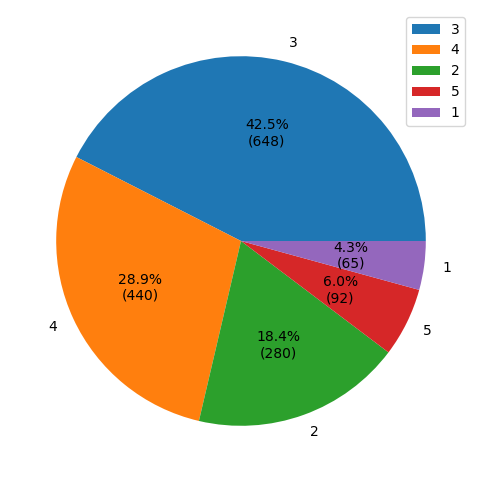

In [30]:
s=(data["economic_cond_household"].value_counts())
print(s)
labels=['3', '4','2','5','1']
plt.figure(figsize=(6, 6))
plt.pie(data['economic_cond_household'].value_counts(),labels=labels, autopct=autopct_format(s))
plt.legend(labels, loc="best")
plt.show()


4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64


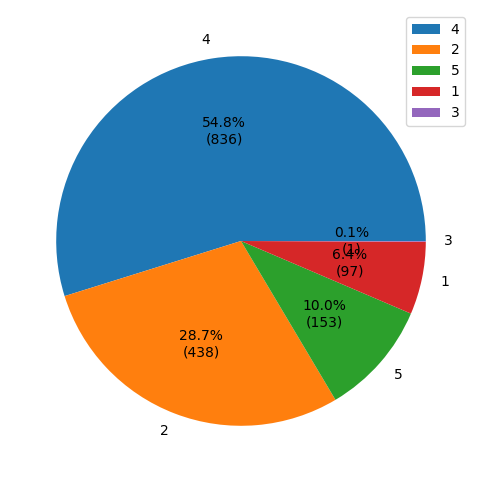

In [31]:
s=(data["Blair"].value_counts())
print(s)

labels=['4', '2','5','1','3']
plt.figure(figsize=(6, 6))
plt.pie(data['Blair'].value_counts(),labels=labels, autopct=autopct_format(s))
plt.legend(labels, loc="best")

plt.show()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64


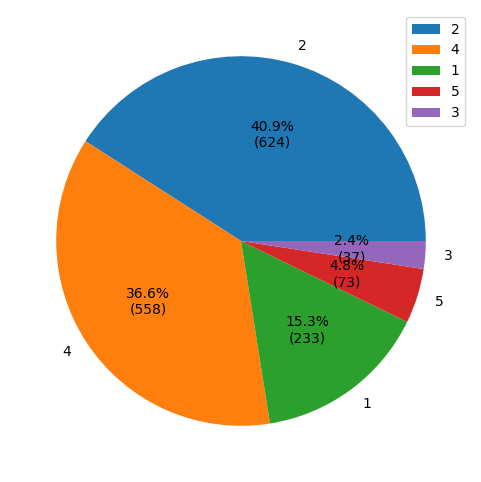

In [32]:
s=(data["Hague"].value_counts())
print(s)
#import matplotlib.pyplot as plt
labels=['2', '4','1','5','3']
plt.figure(figsize=(6, 6))
plt.pie(data['Hague'].value_counts(),labels=labels, autopct=autopct_format(s))
plt.legend(labels)
plt.show()

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64


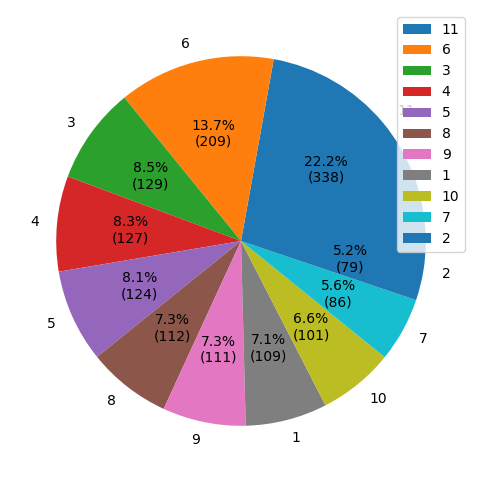

In [33]:
s=(data['Europe'].value_counts())
print(s)

#import matplotlib.pyplot as plt
labels=['11', '6','3','4','5','8','9','1','10','7','2']
plt.figure(figsize=(6, 6))
plt.pie(data['Europe'].value_counts(),labels=labels, autopct=autopct_format(s))
plt.legend(labels)
plt.show()

In [34]:
s=(data['political_knowledge'].value_counts())
print(s)
#import matplotlib.pyplot as plt
labels=['2','0', '3','1']
plt.figure(figsize=(6, 6))
plt.pie(data['political_knowledge'].value_counts(),labels=labels, autopct=autopct_format(s))
plt.legend(labels)
plt.show()

2    782
0    455
3    250
1     38
Name: political_knowledge, dtype: int64


In [35]:
s=(data["gender"].value_counts())
print(s)
#import matplotlib.pyplot as plt
labels=['female', 'male']
plt.figure(figsize=(6, 6))
plt.pie(data['gender'].value_counts(),labels=labels , autopct=autopct_format(s))
plt.legend(labels, loc="best")
plt.show()

female    812
male      713
Name: gender, dtype: int64


Labour          1063
Conservative     462
Name: vote, dtype: int64


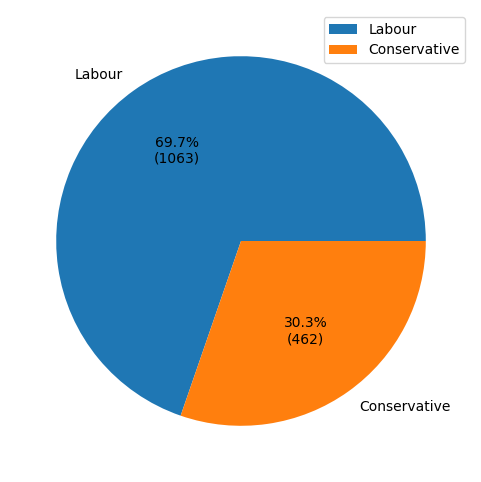

In [36]:
s=data['vote'].value_counts()
print(s)#data["vote"].value_counts())

import matplotlib.pyplot as plt
labels=['Labour', 'Conservative']
plt.figure(figsize=(6, 6))
plt.pie(s,labels=labels , autopct=autopct_format(s))
plt.legend(labels, loc="best")
plt.show()

In [37]:
import seaborn as sns

<ipython-input-38-4ecedb3d0b14>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(data["age"], hist=False,ax=axes[0][1]) #only line
<ipython-input-38-4ecedb3d0b14>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot3=sns.distplot(data['age'], ax=axes[0][2]) #both hist and density
<ipython-in

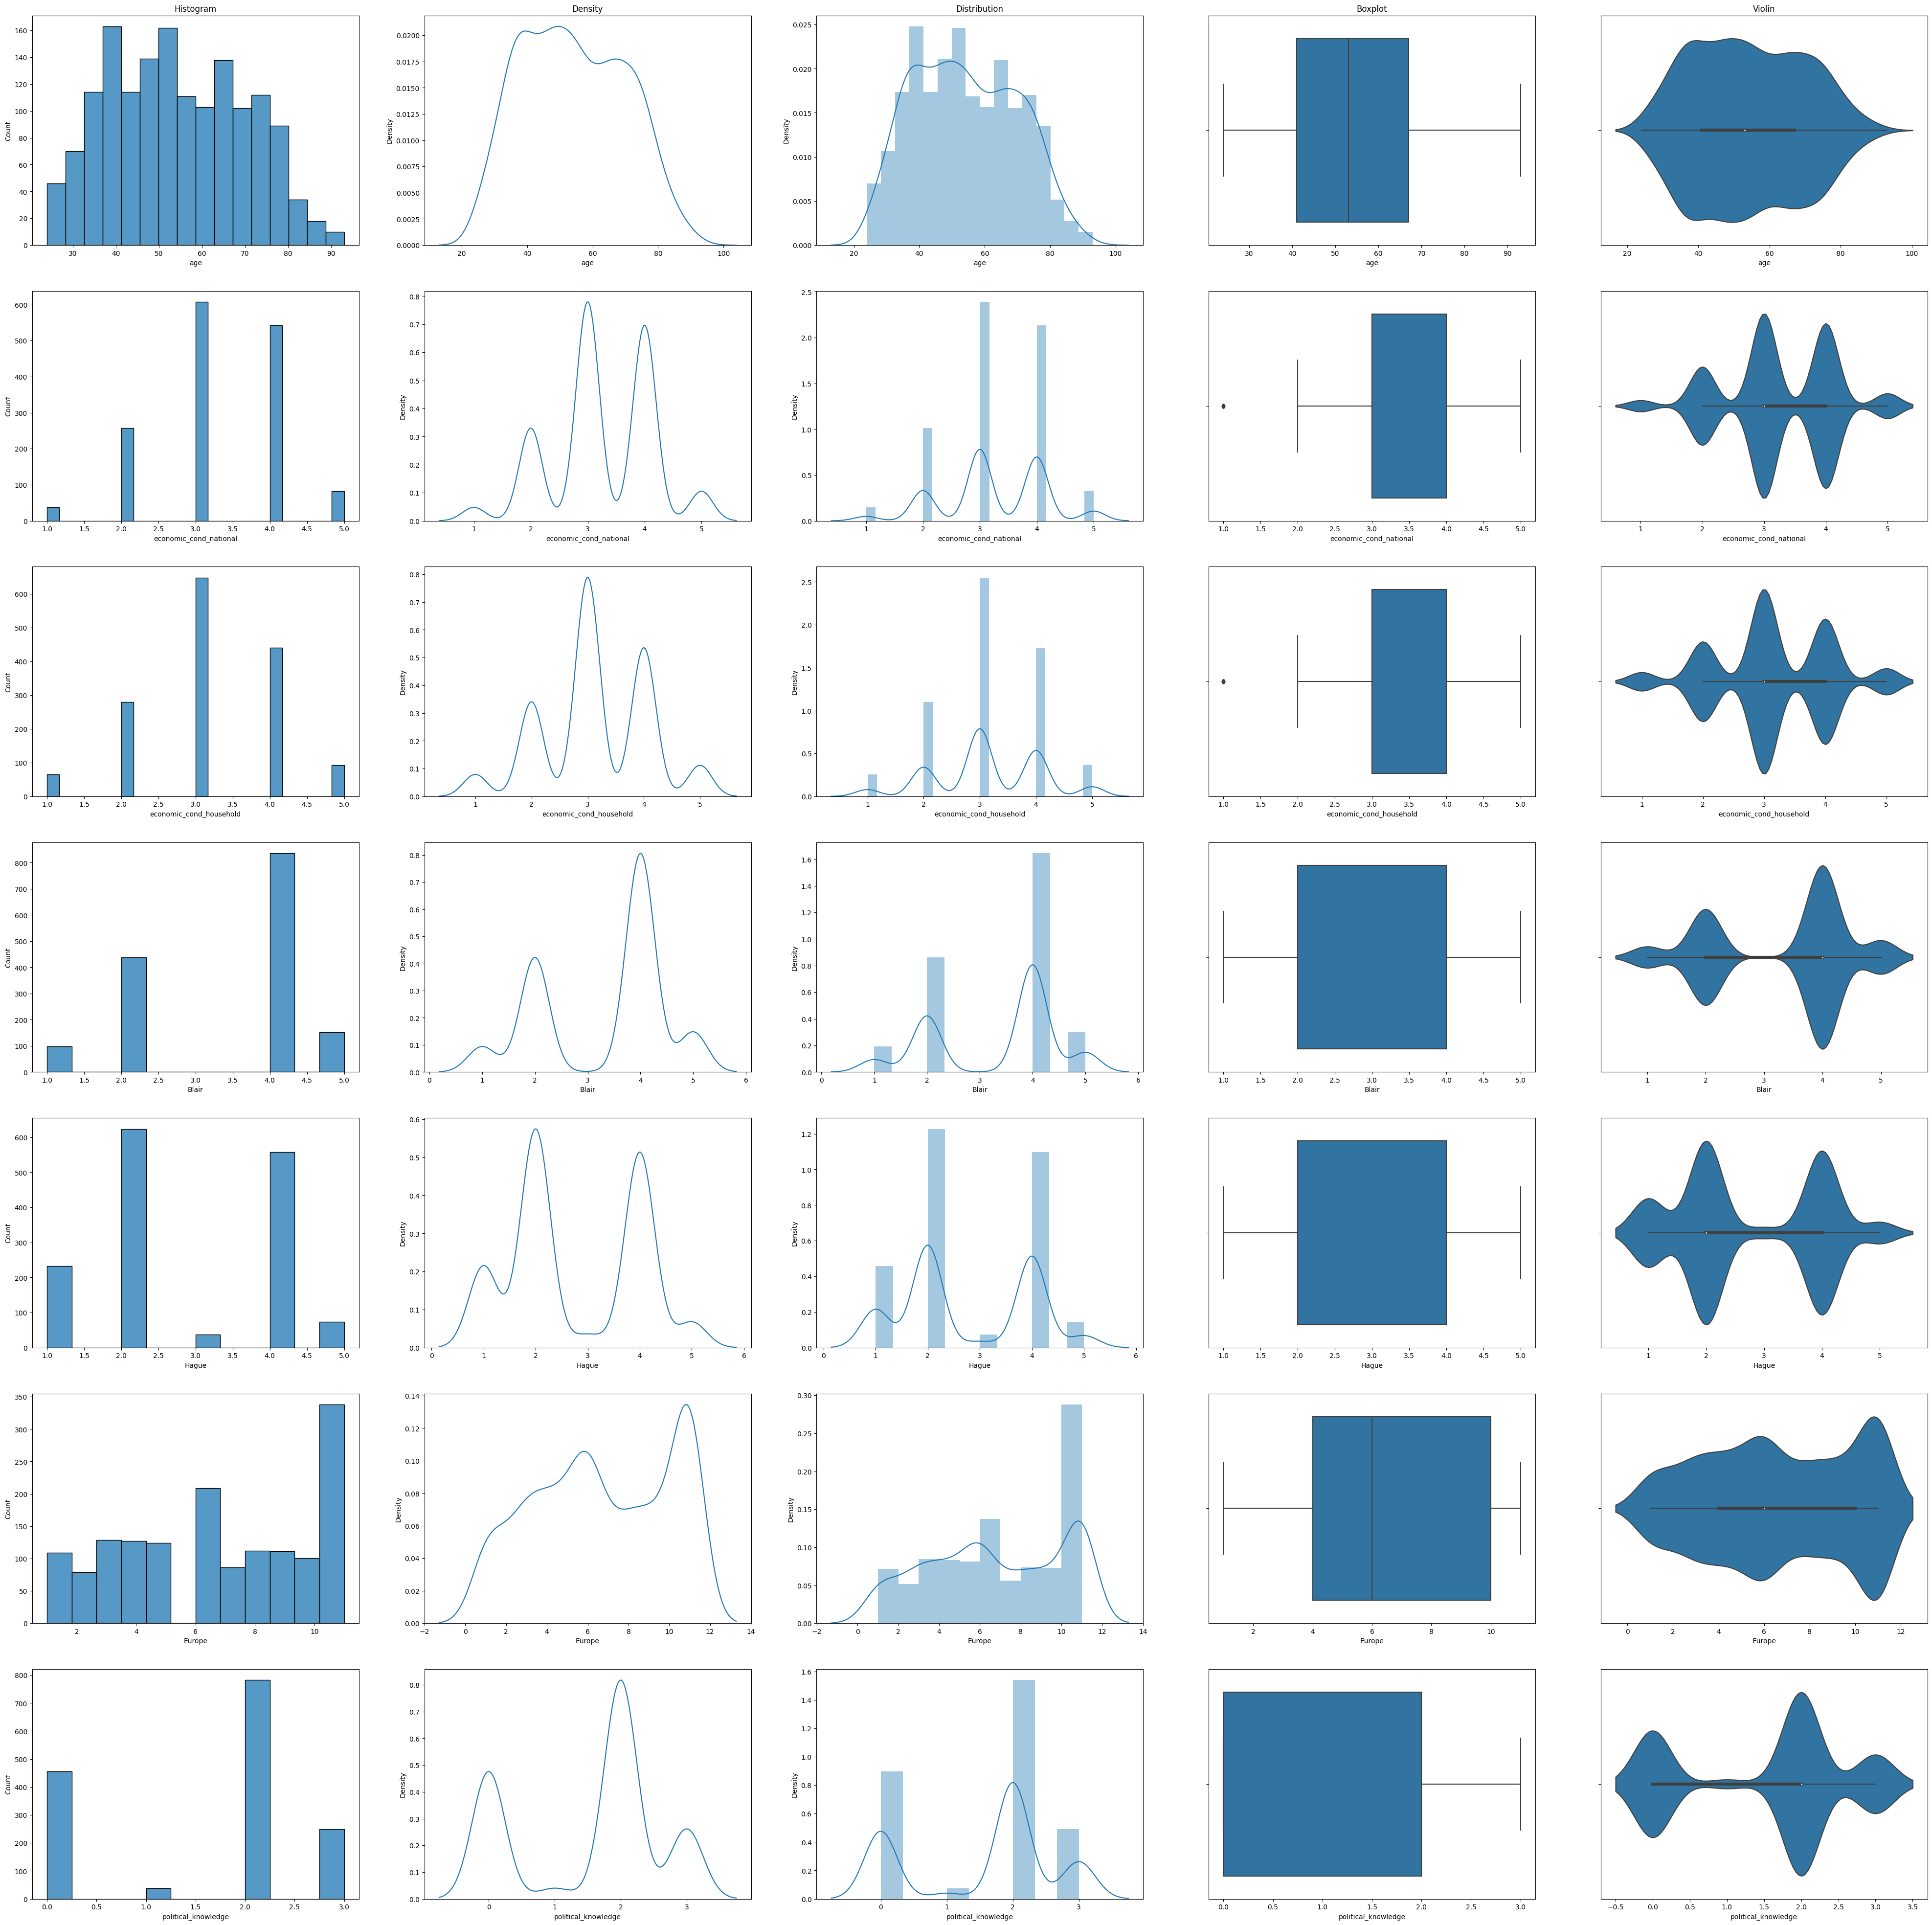

In [38]:
fig, axes = plt.subplots(nrows=7,ncols=5)
fig.set_size_inches(50,50)
#age
plot1=sns.histplot(data["age"],ax=axes[0][0]) #hissto
plot1.set_title("Histogram")

plot2=sns.distplot(data["age"], hist=False,ax=axes[0][1]) #only line
plot2.set_title("Density")

plot3=sns.distplot(data['age'], ax=axes[0][2]) #both hist and density
plot3.set_title("Distribution")

plot4=sns.boxplot(x='age', data=data, ax=axes[0][3]) #box
plot4.set_title("Boxplot")

plot5=sns.violinplot(x=data["age"],ax=axes[0][4]) #violin
plot5.set_title("Violin")

#economic_cond_national
plot1=sns.histplot(data["economic_cond_national"],ax=axes[1][0]) #hissto
plot2=sns.distplot(data["economic_cond_national"], hist=False,ax=axes[1][1]) #only line
plot3=sns.distplot(data['economic_cond_national'], ax=axes[1][2]) #both hist and density
plot4=sns.boxplot(x='economic_cond_national', data=data, ax=axes[1][3]) #box
plot5=sns.violinplot(x=data['economic_cond_national'],ax=axes[1][4]) #violin

#economic_cond_household
plot1=sns.histplot(data["economic_cond_household"],ax=axes[2][0]) #hissto
plot2=sns.distplot(data["economic_cond_household"], hist=False,ax=axes[2][1]) #only line
plot3=sns.distplot(data['economic_cond_household'], ax=axes[2][2]) #both hist and density
plot4=sns.boxplot(x='economic_cond_household', data=data, ax=axes[2][3]) #box
plot5=sns.violinplot(x=data['economic_cond_household'],ax=axes[2][4]) #violin

#blair
plot1=sns.histplot(data["Blair"],ax=axes[3][0]) #hissto
plot2=sns.distplot(data["Blair"], hist=False,ax=axes[3][1]) #only line
plot3=sns.distplot(data['Blair'], ax=axes[3][2]) #both hist and density
plot4=sns.boxplot(x='Blair', data=data, ax=axes[3][3]) #box
plot5=sns.violinplot(x=data['Blair'],ax=axes[3][4]) #violin

#hague
plot1=sns.histplot(data["Hague"],ax=axes[4][0]) #hissto
plot2=sns.distplot(data["Hague"], hist=False,ax=axes[4][1]) #only line
plot3=sns.distplot(data['Hague'], ax=axes[4][2]) #both hist and density
plot4=sns.boxplot(x='Hague', data=data, ax=axes[4][3]) #box
plot5=sns.violinplot(x=data['Hague'],ax=axes[4][4]) #violin

#europe
plot1=sns.histplot(data["Europe"],ax=axes[5][0]) #hissto
plot2=sns.distplot(data["Europe"], hist=False,ax=axes[5][1]) #only line
plot3=sns.distplot(data['Europe'], ax=axes[5][2]) #both hist and density
plot4=sns.boxplot(x='Europe', data=data, ax=axes[5][3]) #box
plot5=sns.violinplot(x=data['Europe'],ax=axes[5][4]) #violin

#political knowledge
plot1=sns.histplot(data["political_knowledge"],ax=axes[6][0]) #hissto
plot2=sns.distplot(data["political_knowledge"], hist=False,ax=axes[6][1]) #only line
plot3=sns.distplot(data['political_knowledge'], ax=axes[6][2]) #both hist and density
plot4=sns.boxplot(x='political_knowledge', data=data, ax=axes[6][3]) #box
plot5=sns.violinplot(x=data['political_knowledge'],ax=axes[6][4]) #violin

plt.show()

**INFERENCE:**

Here we can see that all numerical variables nearly follows normal distribution.
Also there are outliers in economic_cond_national and economic_cond_household

---



## *BIVARIATE & MULTIVARIATE ANALYSIS AND EXPLANATORY DATA ANALYSIS*

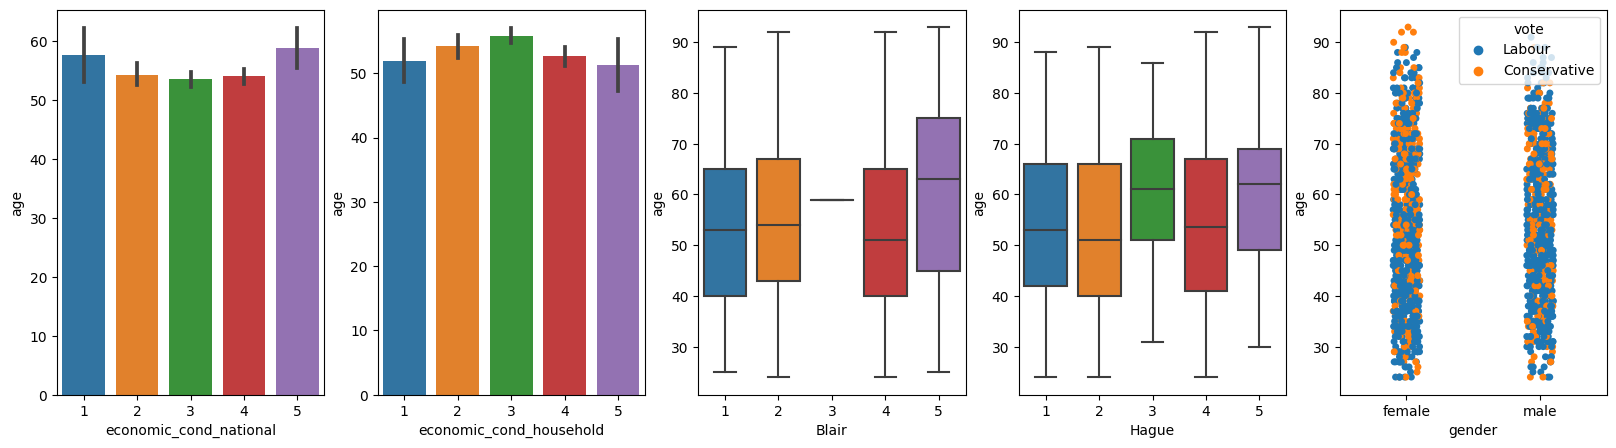

In [39]:
fig, axes = plt.subplots(nrows=1,ncols=5)
fig.set_size_inches(20,5)

sns.barplot(x=data["economic_cond_national"],y=data["age"],ax=axes[0])
sns.barplot(x=data["economic_cond_household"],y=data["age"],ax=axes[1])
sns.boxplot(x=data["Blair"],y=data["age"],ax=axes[2])
sns.boxplot(x=data["Hague"],y=data["age"],ax=axes[3])
sns.stripplot(x=data["gender"],y=data["age"], ax = axes[4],hue=data["vote"])
plt.show()

**INFERENCE:**

* Age of people are more in economic_cond_national :5 and economic_cond_household:3
* Also there are more people above age 45 with Blair jobs and more Hague has higher of neutral points
*And more female voters for labour compared to male can be infered from the above outputs

In [40]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(20,30)

sns.histplot(data =data , x = "Blair", hue = "economic_cond_national",ax=axes[0][0],multiple='dodge')
sns.histplot(data =data , x = "Hague", hue = "economic_cond_national",ax=axes[0][1],multiple='dodge')


sns.histplot(data =data , x = "Blair", hue = "economic_cond_household",ax=axes[1][0])
sns.histplot(data =data , x = "Hague", hue = "economic_cond_household",ax=axes[1][1])


sns.histplot(data =data , x = "Blair", hue = "Europe",ax=axes[2][0],multiple='dodge')
sns.histplot(data =data , x = "Hague", hue = "Europe",ax=axes[2][1],multiple='dodge')

sns.histplot(data =data , x = "Blair", hue = "political_knowledge",ax=axes[3][0])
sns.histplot(data =data , x = "Hague", hue = "political_knowledge",ax=axes[3][1])

sns.histplot(data =data , x = "Blair", hue = "gender",ax=axes[4][0],multiple='dodge')
sns.histplot(data =data , x = "Hague", hue = "gender",ax=axes[4][1],multiple='dodge')

sns.histplot(data =data , x = "Blair", hue = "vote",ax=axes[4][0],multiple='dodge')
sns.histplot(data =data , x = "Hague", hue = "vote",ax=axes[4][1],multiple='dodge')

sns.histplot(data =data , x = "Europe", hue = "vote",ax=axes[5][0],multiple='dodge')
sns.histplot(data =data , x = "political_knowledge", hue = "vote",ax=axes[5][1],multiple='dodge')

<Axes: xlabel='political_knowledge', ylabel='Count'>

**INFERENCE**

* Blair has more points in economic_cond_national and economic_cond_household than Hague
* Also Blair is leading in whole Europe with high points for female and political knowledge than male and Hague

# **PAIRPLOT**

<Figure size 2000x2000 with 0 Axes>

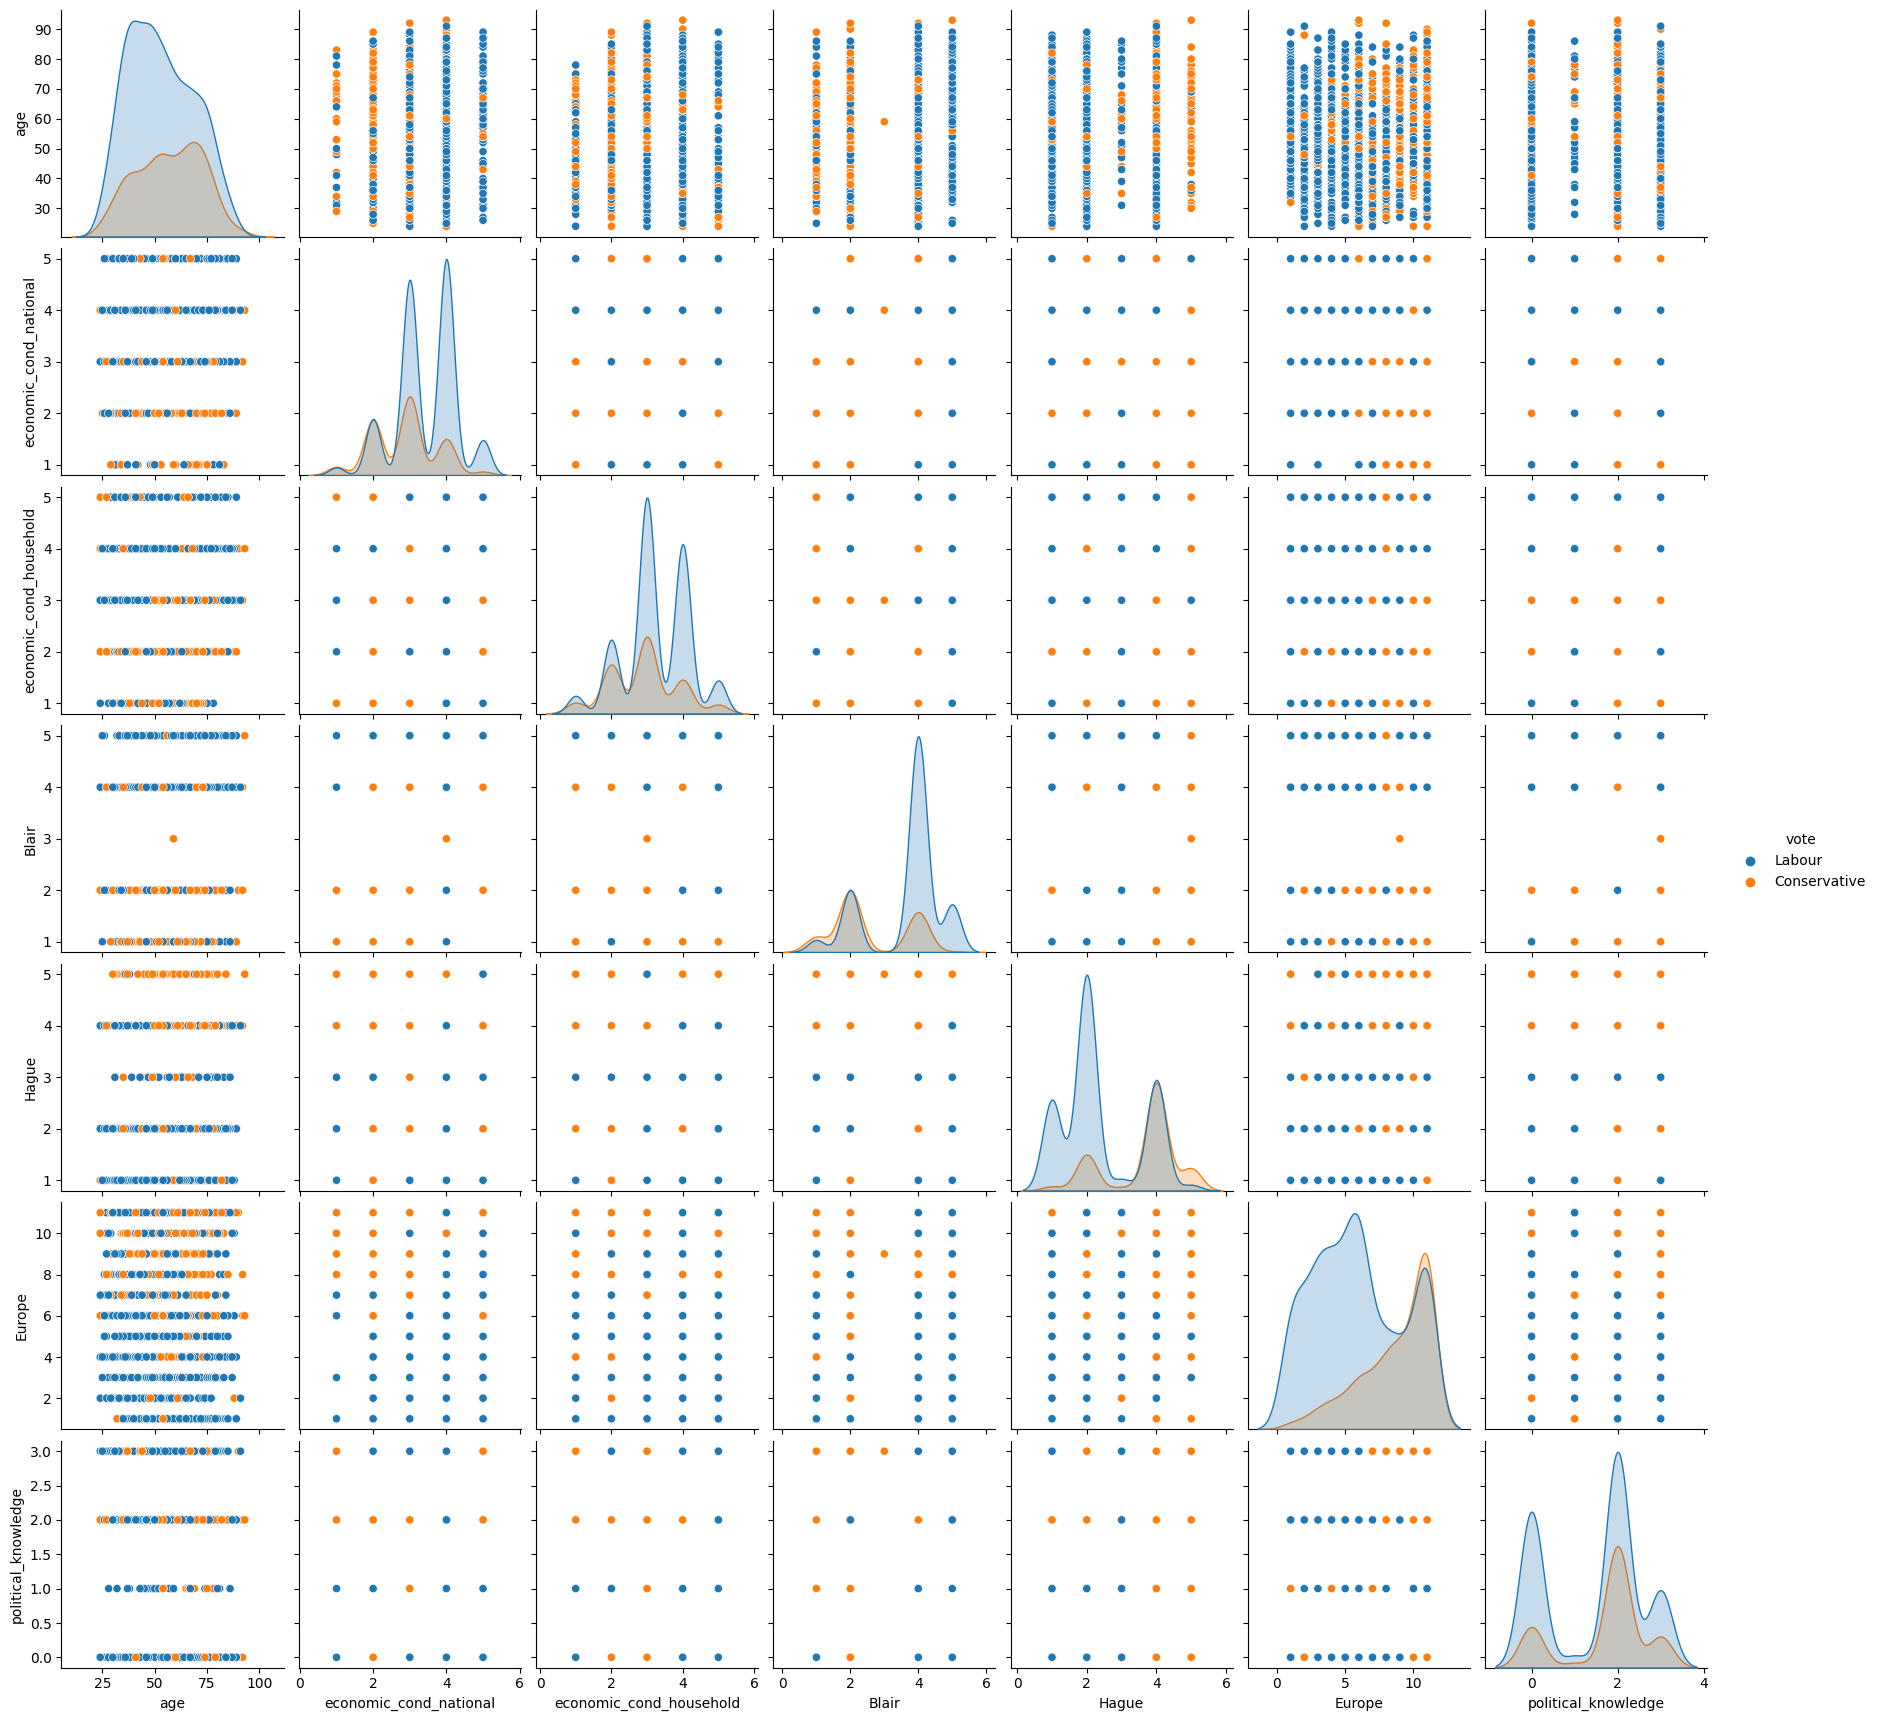

In [41]:
plt.figure(figsize=(20,20))
sns.pairplot(data,hue="vote")

**INFERENCE:**

From the above output we can infer that there is mixture of realtionship between the variables fro further understanding we'll use correlation and covariance

---



**Covariance** measures the direction of the relationship between two variables.

A positive covariance means that both variables tend to be high or low at the same time.

A negative covariance means that when one variable is high, the other tends to be low.

In [42]:
# Calculate the covariance matrix
data.cov()

<ipython-input-42-eba97178e679>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.cov()


age  economic_cond_national  \
age                      246.842075                0.256981   
economic_cond_national     0.256981                0.776107   
economic_cond_household   -0.607619                0.283712   
Blair                      0.557762                0.338314   
Hague                      0.669531               -0.216589   
Europe                     3.568550               -0.608397   
political_knowledge       -0.825301               -0.022546   

                         economic_cond_household     Blair     Hague  \
age                                    -0.607619  0.557762  0.669531   
economic_cond_national                  0.283712  0.338314 -0.216589   
economic_cond_household                 0.864810  0.235192 -0.116689   
Blair                                   0.235192  1.380212 -0.351648   
Hague                                  -0.116689 -0.351648  1.514631   
Europe                                 -0.352299 -1.147341  1.166149   
political_knowledge                    -0.038091 -0.026621 -0.040469   

                            Europe  political_knowledge  
age                       3.568550            -0.825301  
economic_cond_national   -0.608397            -0.022546  
economic_cond_household  -0.352299            -0.038091  
Blair                    -1.147341            -0.026621  
Hague                     1.166149            -0.040469  
Europe                   10.873759            -0.544285  
political_knowledge      -0.544285             1.173571

**INFERENCE:**
* From the above we can infer that age and Europe are having positive covariance (i.e) they both are in same positive direction

**CORRELATION**
We can get idea of the correlation strength between different variables by using correlation.

This is the correlation matrix with the range from +1 to -1 where,

 +1 is highly and positively correlated and

 -1 will be highly negatively correlated.

In [43]:
#correlation matrix
data.corr()

<ipython-input-43-609b5b21423e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


age  economic_cond_national  \
age                      1.000000                0.018567   
economic_cond_national   0.018567                1.000000   
economic_cond_household -0.041587                0.346303   
Blair                    0.030218                0.326878   
Hague                    0.034626               -0.199766   
Europe                   0.068880               -0.209429   
political_knowledge     -0.048490               -0.023624   

                         economic_cond_household     Blair     Hague  \
age                                    -0.041587  0.030218  0.034626   
economic_cond_national                  0.346303  0.326878 -0.199766   
economic_cond_household                 1.000000  0.215273 -0.101956   
Blair                                   0.215273  1.000000 -0.243210   
Hague                                  -0.101956 -0.243210  1.000000   
Europe                                 -0.114885 -0.296162  0.287350   
political_knowledge                    -0.037810 -0.020917 -0.030354   

                           Europe  political_knowledge  
age                      0.068880            -0.048490  
economic_cond_national  -0.209429            -0.023624  
economic_cond_household -0.114885            -0.037810  
Blair                   -0.296162            -0.020917  
Hague                    0.287350            -0.030354  
Europe                   1.000000            -0.152364  
political_knowledge     -0.152364             1.000000

<ipython-input-44-1672eb116d20>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), annot=True,linewidth = 1)


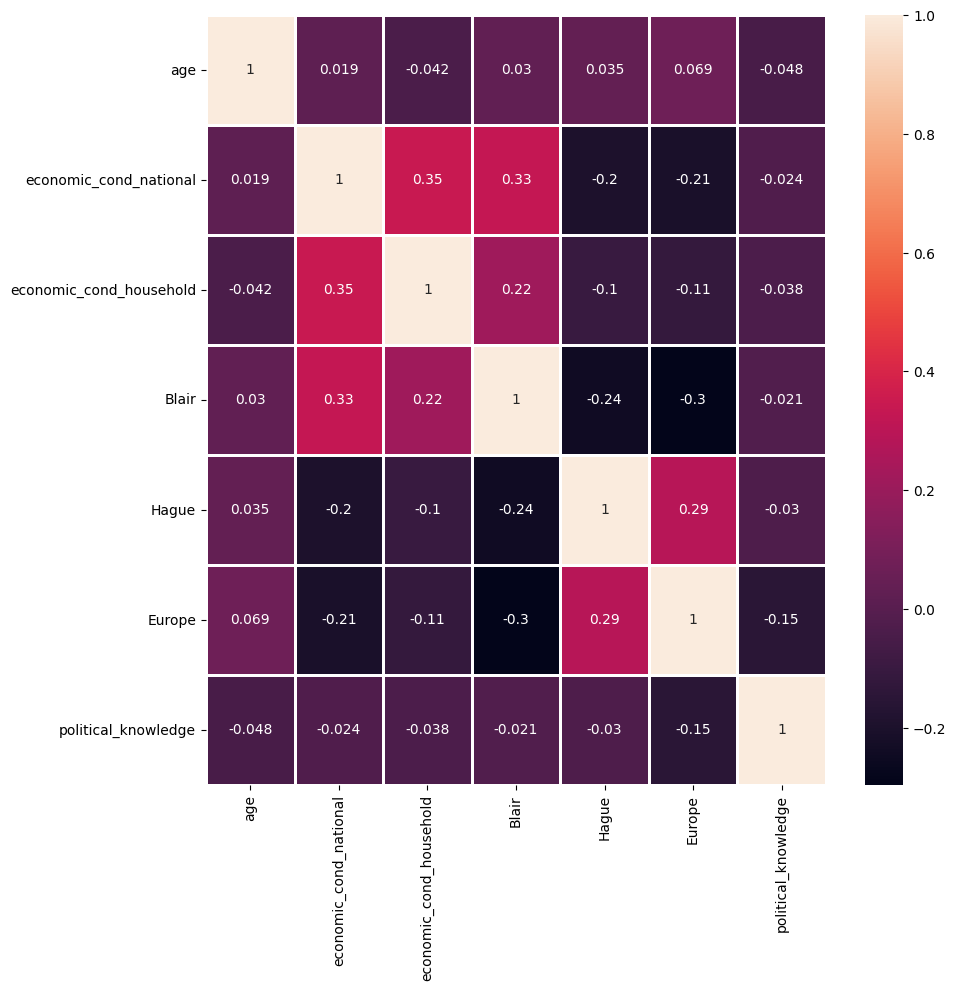

In [44]:
#correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
dataplot = sns.heatmap(data.corr(), annot=True,linewidth = 1)

**INFERENCE:**

* High positively correlated economic_cond_national and economic_cond_household

---



## ***OUTLIERS***

Already from the univariate analysis we infered that there are outliers in economic_cond_national and economic_cond_household so to remove those outliers we can use several technique Z-score Treatment (standard deviation method), IQR Based Filtering, Percentile Method

**IQR** method is best suited for datasets which are skewed (either left or right)

**Standard Deviations** to detect outliers when the data is Normally distributed

* Since here attributes having outliers are left skewed we use IQR method to remove it

In [45]:
def outlier(col):
  percentile25 = data[col].quantile(0.25)
  percentile75 = data[col].quantile(0.75)
  iqr = percentile75-percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  print("COLUMN:",col,"\n",lower_limit,":",upper_limit)

outlier("economic_cond_national")
outlier("economic_cond_household")

COLUMN: economic_cond_national 
 1.5 : 5.5
COLUMN: economic_cond_household 
 1.5 : 5.5


**INFERENCE:**

* Since the outliers of both the attributes are values >=1 (from the plots in univariate analysis) and their respective lower limit is 1.5 so we'll proceed without removing them


---



# **Data Preparation: 5 marks**

### *Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)*

***ENCODING*** : As ML models can't work with string (categorical value) we'll convert them into numeric by encoding

In [46]:
data["gender"].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [47]:
data["vote"].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

**INFERENCE:**

* Here 2 categroical variables gender and votes so encoding them.
* So using dummy encoding here since there are only 2 categories are in those attributes.

In [48]:
status1=pd.get_dummies(data['gender'])
status2=pd.get_dummies(data["vote"])

In [49]:
data=pd.concat([data,status1],axis=1)
data.head(5)

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
1  Labour   43                       3                        3      4      1   
2  Labour   36                       4                        4      4      4   
3  Labour   35                       4                        4      5      2   
4  Labour   24                       4                        2      2      1   
5  Labour   41                       2                        2      1      1   

   Europe  political_knowledge  gender  female  male  
1       2                    2  female       1     0  
2       5                    2    male       0     1  
3       3                    2    male       0     1  
4       4                    0  female       1     0  
5       6                    2    male       0     1

In [50]:
data=pd.concat([data,status2],axis=1)
data.head(5)

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
1  Labour   43                       3                        3      4      1   
2  Labour   36                       4                        4      4      4   
3  Labour   35                       4                        4      5      2   
4  Labour   24                       4                        2      2      1   
5  Labour   41                       2                        2      1      1   

   Europe  political_knowledge  gender  female  male  Conservative  Labour  
1       2                    2  female       1     0             0       1  
2       5                    2    male       0     1             0       1  
3       3                    2    male       0     1             0       1  
4       4                    0  female       1     0             0       1  
5       6                    2    male       0     1             0       1

In [51]:
data.shape

(1525, 13)

**INFERENCE:**

After encoding additional columns are added which increases the dimension of the dataset, since there are only 2 types in each of the categroical variables performing dumming encoding by dropping one column belonging to each attribute

In [52]:
data=data.drop(['gender','vote', 'male','Labour'], axis=1)

**Data after encoding**

In [53]:
data.head(5)

age  economic_cond_national  economic_cond_household  Blair  Hague  Europe  \
1   43                       3                        3      4      1       2   
2   36                       4                        4      4      4       5   
3   35                       4                        4      5      2       3   
4   24                       4                        2      2      1       4   
5   41                       2                        2      1      1       6   

   political_knowledge  female  Conservative  
1                    2       1             0  
2                    2       0             0  
3                    2       0             0  
4                    0       1             0  
5                    2       0             0

In [54]:
data.shape

(1525, 9)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1525 non-null   int64
 1   economic_cond_national   1525 non-null   int64
 2   economic_cond_household  1525 non-null   int64
 3   Blair                    1525 non-null   int64
 4   Hague                    1525 non-null   int64
 5   Europe                   1525 non-null   int64
 6   political_knowledge      1525 non-null   int64
 7   female                   1525 non-null   uint8
 8   Conservative             1525 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 98.3 KB


In [56]:
dict = {'female': 'gender',
        'Conservative': 'vote'}
data.rename(columns=dict,
          inplace=True)
data.head(5)

age  economic_cond_national  economic_cond_household  Blair  Hague  Europe  \
1   43                       3                        3      4      1       2   
2   36                       4                        4      4      4       5   
3   35                       4                        4      5      2       3   
4   24                       4                        2      2      1       4   
5   41                       2                        2      1      1       6   

   political_knowledge  gender  vote  
1                    2       1     0  
2                    2       0     0  
3                    2       0     0  
4                    0       1     0  
5                    2       0     0

In [57]:
print("Dimension of the dataset:",data.shape)
print("\n")
print("Gender:\n 1-female 0-male\n",data["gender"].value_counts())
print("\n")
print("Vote:\n 1-Conservative 0-Labour \n",data["vote"].value_counts())

Dimension of the dataset: (1525, 9)


Gender:
 1-female 0-male
 1    812
0    713
Name: gender, dtype: int64


Vote:
 1-Conservative 0-Labour 
 0    1063
1     462
Name: vote, dtype: int64


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import *
from sklearn.ensemble import *
from sklearn.ensemble import *

# **MODELLING**

In [59]:
final_table1=pd.DataFrame()#without scaling
final_table2=pd.DataFrame()#scaled

**NOTE:**

Scaling is technique to standardize the independent features present in the data in a fixed range.

So here we'll perform modelling on both scaled and not scaled dataset

### ***Without Scaling***

In [60]:
X=data.drop('vote',axis=1)
Y=data['vote']
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.70, random_state=1)

**INFERENCE:**

Since vote is the target variable lets store it in a variable y which is output and other variables are considered as inputs

In [61]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(1067, 8)
(1067,)
(458, 8)
(458,)


***Logistic regression***

TRAINING
MODEL SCORE: 0.8397375820056232
CONFUSION MATRIX:
 [[667  68]
 [103 229]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       735
           1       0.77      0.69      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067

Axes(0.125,0.11;0.62x0.77)


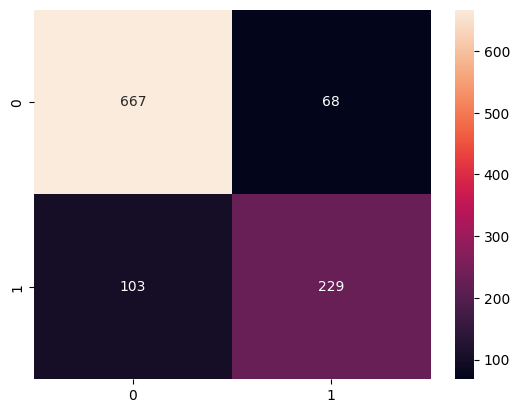

In [62]:

lr = LogisticRegression(tol=0.0001,max_iter=2000,random_state= 0)
l=lr.fit(X_train,Y_train)
y_train_predict=lr.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
model_scoret=lr.score(X_train, Y_train)

print("TRAINING")
print("MODEL SCORE:",model_scoret)

print("CONFUSION MATRIX:\n",confusion_matrix(Y_train,y_train_predict))

print(classification_report(Y_train ,y_train_predict))

print(sns.heatmap(confusion_matrix(Y_train,y_train_predict),annot=True , fmt="2g"))



TEST
MODEL SCORE: 0.8231441048034934
CONFUSION MATRIX:
 [[292  36]
 [ 45  85]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458

Axes(0.125,0.11;0.62x0.77)


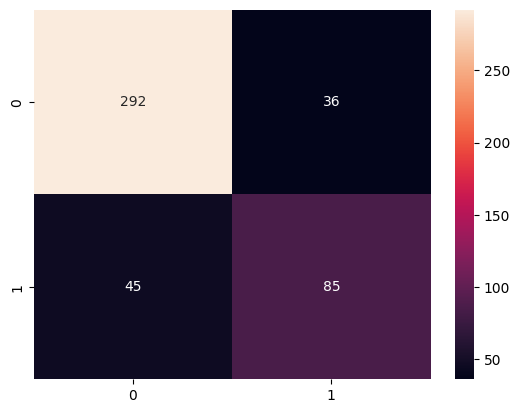

In [63]:
print("TEST")
y_test_predict=lr.predict(X_test)

model_score=lr.score(X_test, Y_test)
print("MODEL SCORE:",model_score)

print("CONFUSION MATRIX:\n",confusion_matrix(Y_test,y_test_predict))

print(classification_report(Y_test ,y_test_predict))

print(sns.heatmap(confusion_matrix(Y_test,y_test_predict),annot=True , fmt="2g"))

In [64]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
probs = lr.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()

In [65]:
probst = lr.predict_proba(X_train)
probst = probst[:, 1]
probs = lr.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"Logistic Regression",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table1=    final_table1.append(data_append,ignore_index=True)

<ipython-input-65-ccbb4154d1d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table1=    final_table1.append(data_append,ignore_index=True)


***LINEAR DISCRIMINANT ANALYSIS***

MODEL SCORE: 0.8231441048034934
[[660  99]
 [ 75 233]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       759
           1       0.70      0.76      0.73       308

    accuracy                           0.84      1067
   macro avg       0.80      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067

Axes(0.125,0.11;0.62x0.77)


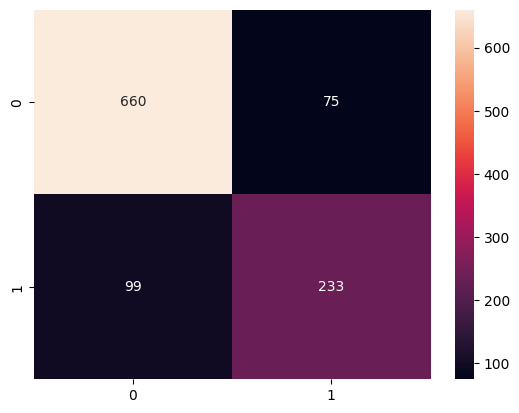

In [66]:
lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_train,Y_train)
y_train_predict=lda.predict(X_train)

model_scoret=lda.score(X_train, Y_train)
print("MODEL SCORE:",model_score)

print(confusion_matrix(lda.predict(X_train),Y_train))
print(classification_report(lda.predict(X_train),Y_train))

print(sns.heatmap(confusion_matrix(Y_train,y_train_predict),annot=True , fmt="2g"))

In [67]:
#lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_test,Y_test)
y_test_predict=lda.predict(X_test)

model_score=lda.score(X_test, Y_test)
print("MODEL SCORE:",model_score)

print(confusion_matrix(lda.predict(X_test),Y_test))
print(classification_report(lda.predict(X_test),Y_test))

print(sns.heatmap(confusion_matrix(Y_test,y_test_predict),annot=True , fmt="2g"))

MODEL SCORE: 0.834061135371179
[[298  46]
 [ 30  84]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       344
           1       0.65      0.74      0.69       114

    accuracy                           0.83       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.84      0.83      0.84       458

Axes(0.125,0.11;0.62x0.77)


In [68]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
probs = lda.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()

In [69]:
probst = lda.predict_proba(X_train)
probst = probst[:, 1]
probs = lda.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"LDA",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table1=    final_table1.append(data_append,ignore_index=True)

<ipython-input-69-5865292e8c81>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table1=    final_table1.append(data_append,ignore_index=True)


***KNN***

0.9990627928772259
[[735   1]
 [  0 331]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       736
           1       1.00      1.00      1.00       331

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067

Axes(0.125,0.11;0.62x0.77)


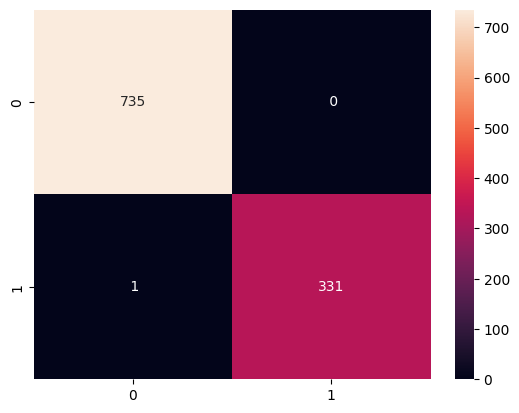

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn = knn.fit(X_train,Y_train)
pred_label= knn.predict(X_train)
model_scoret=knn.score(X_train,Y_train)
print(knn.score(X_train,Y_train))
print(confusion_matrix(knn.predict(X_train),Y_train))
print(classification_report(knn.predict(X_train),Y_train))

print(sns.heatmap(confusion_matrix(Y_train,pred_label),annot=True , fmt="2g"))

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn = knn.fit(X_train,Y_train)
pred_label= knn.predict(X_train)
print(knn.score(X_train,Y_train))
print(confusion_matrix(knn.predict(X_train),Y_train))
print(classification_report(knn.predict(X_train),Y_train))

print(sns.heatmap(confusion_matrix(Y_train,pred_label),annot=True , fmt="2g"))

0.8744142455482662
[[735 134]
 [  0 198]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       869
           1       0.60      1.00      0.75       198

    accuracy                           0.87      1067
   macro avg       0.80      0.92      0.83      1067
weighted avg       0.93      0.87      0.89      1067

Axes(0.125,0.11;0.62x0.77)


In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn = knn.fit(X_train,Y_train)
pred_label= knn.predict(X_train)
print(knn.score(X_train,Y_train))
print(confusion_matrix(knn.predict(X_train),Y_train))
print(classification_report(knn.predict(X_train),Y_train))

print(sns.heatmap(confusion_matrix(Y_train,pred_label),annot=True , fmt="2g"))

0.872539831302718
[[679  80]
 [ 56 252]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       759
           1       0.76      0.82      0.79       308

    accuracy                           0.87      1067
   macro avg       0.84      0.86      0.85      1067
weighted avg       0.88      0.87      0.87      1067

Axes(0.125,0.11;0.62x0.77)


0.8500468603561387
[[703 128]
 [ 32 204]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       831
           1       0.61      0.86      0.72       236

    accuracy                           0.85      1067
   macro avg       0.79      0.86      0.81      1067
weighted avg       0.88      0.85      0.86      1067

Axes(0.125,0.11;0.62x0.77)


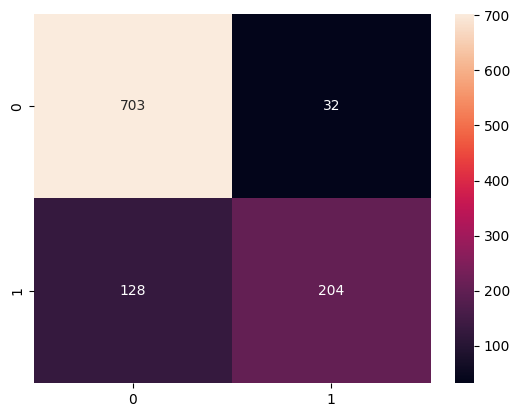

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn = knn.fit(X_train,Y_train)
pred_label= knn.predict(X_train)
print(knn.score(X_train,Y_train))
print(confusion_matrix(knn.predict(X_train),Y_train))
print(classification_report(knn.predict(X_train),Y_train))

print(sns.heatmap(confusion_matrix(Y_train,pred_label),annot=True , fmt="2g"))

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn = knn.fit(X_train,Y_train)

pred_label= knn.predict(X_train)
model_scoret=knn.score(X_train,Y_train)
print(knn.score(X_train,Y_train))
print(confusion_matrix(knn.predict(X_train),Y_train))
print(classification_report(knn.predict(X_train),Y_train))

print(sns.heatmap(confusion_matrix(Y_train,pred_label),annot=True , fmt="2g"))

0.8584817244611059
[[672  88]
 [ 63 244]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       760
           1       0.73      0.79      0.76       307

    accuracy                           0.86      1067
   macro avg       0.82      0.84      0.83      1067
weighted avg       0.86      0.86      0.86      1067

Axes(0.125,0.11;0.62x0.77)


In [75]:
knn = knn.fit(X_test,Y_test)
pred_label= knn.predict(X_test)
model_score=knn.score(X_test,Y_test)
print(knn.score(X_test,Y_test))
print(confusion_matrix(knn.predict(X_test),Y_test))
print(classification_report(knn.predict(X_test),Y_test))

print(sns.heatmap(confusion_matrix(Y_test,pred_label),annot=True , fmt="2g"))

0.8777292576419214
[[304  32]
 [ 24  98]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       336
           1       0.75      0.80      0.78       122

    accuracy                           0.88       458
   macro avg       0.84      0.85      0.85       458
weighted avg       0.88      0.88      0.88       458

Axes(0.125,0.11;0.62x0.77)


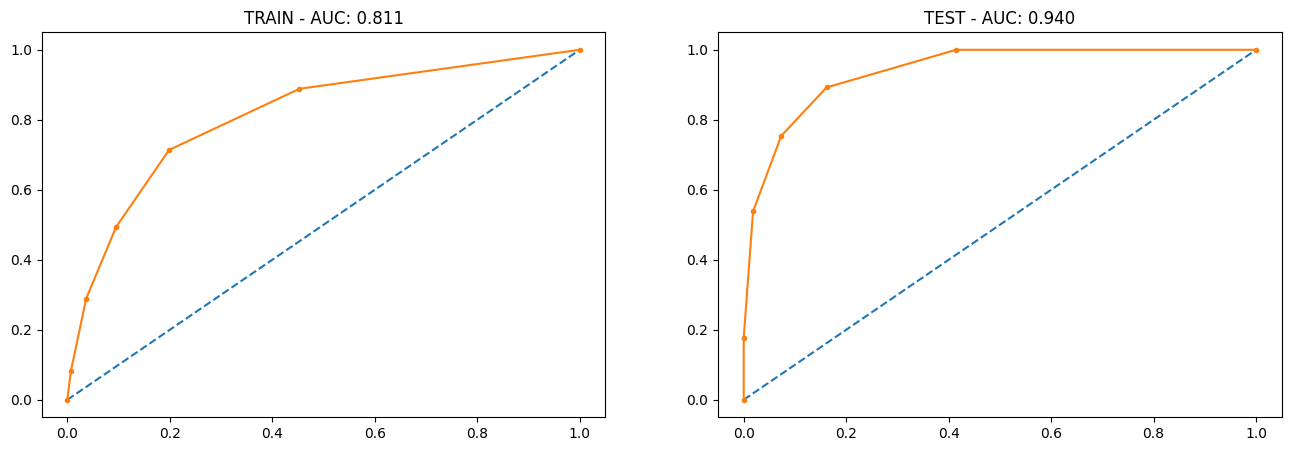

In [76]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
probs = knn.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()


In [77]:
probst = knn.predict_proba(X_train)
probst = probst[:, 1]
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"KNN",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table1=    final_table1.append(data_append,ignore_index=True)

<ipython-input-77-d415a66e068e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table1=    final_table1.append(data_append,ignore_index=True)


**INFERENCE:**

When k=5 the performence of the model and the results are good

***Naive Bayes***

0.8331771321462043
[[649  92]
 [ 86 240]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       741
           1       0.72      0.74      0.73       326

    accuracy                           0.83      1067
   macro avg       0.80      0.81      0.80      1067
weighted avg       0.83      0.83      0.83      1067

Axes(0.125,0.11;0.62x0.77)


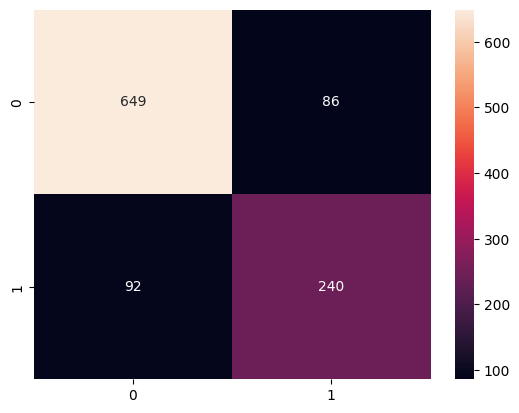

In [78]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb= nb.fit(X_train, Y_train)
model_scoret=nb.score(X_train,Y_train)
print(nb.score(X_train,Y_train))
print(confusion_matrix(nb.predict(X_train),Y_train))
print(classification_report(nb.predict(X_train),Y_train))
print(sns.heatmap(confusion_matrix(Y_train,nb.predict(X_train)),annot=True , fmt="2g"))


In [79]:
nb= nb.fit(X_test, Y_test)
model_score=nb.score(X_test,Y_test)
print(nb.score(X_test,Y_test))
print(confusion_matrix(nb.predict(X_test),Y_test))
print(classification_report(nb.predict(X_test),Y_test))
print(sns.heatmap(confusion_matrix(Y_test,nb.predict(X_test)),annot=True , fmt="2g"))

0.8362445414847162
[[292  39]
 [ 36  91]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       331
           1       0.70      0.72      0.71       127

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458

Axes(0.125,0.11;0.62x0.77)


In [80]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
probs = nb.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()

In [81]:
probst = nb.predict_proba(X_train)
probst = probst[:, 1]
probs = nb.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"Naive Bayes",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table1=    final_table1.append(data_append,ignore_index=True)

<ipython-input-81-1db073ff6337>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table1=    final_table1.append(data_append,ignore_index=True)


***SVM***

0.7835051546391752
[[701 197]
 [ 34 135]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       898
           1       0.41      0.80      0.54       169

    accuracy                           0.78      1067
   macro avg       0.68      0.79      0.70      1067
weighted avg       0.87      0.78      0.81      1067

Axes(0.125,0.11;0.62x0.77)


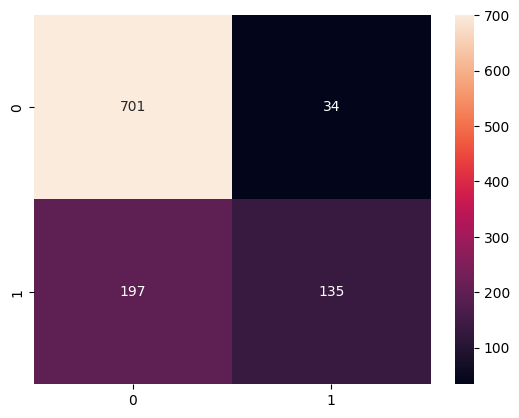

In [82]:
svc=SVC()
# fit classifier to training set
svm=svc.fit(X_train,Y_train)

# make predictions on test set
y_train_pred=svm.predict(X_train)

print(svm.score(X_train,Y_train))
print(confusion_matrix(svm.predict(X_train),Y_train))
print(classification_report(y_train_pred,Y_train))
print(sns.heatmap(confusion_matrix(Y_train,y_train_pred),annot=True , fmt="2g"))

0.8397375820056232
[[663  99]
 [ 72 233]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       762
           1       0.70      0.76      0.73       305

    accuracy                           0.84      1067
   macro avg       0.80      0.82      0.81      1067
weighted avg       0.84      0.84      0.84      1067

Axes(0.125,0.11;0.62x0.77)


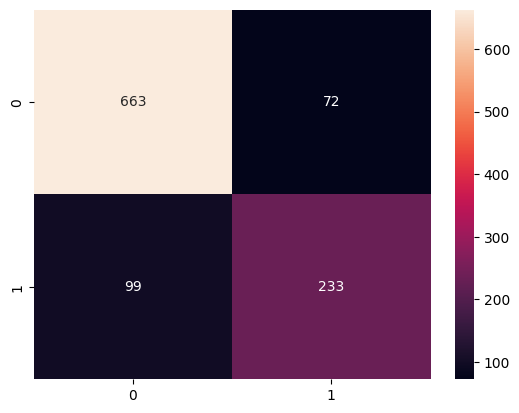

In [83]:
svc=SVC(C=100.0)
# fit classifier to training set
svm=svc.fit(X_train,Y_train)

# make predictions on test set
y_train_pred=svm.predict(X_train)

print(svm.score(X_train,Y_train))
print(confusion_matrix(svm.predict(X_train),Y_train))
print(classification_report(y_train_pred,Y_train))
print(sns.heatmap(confusion_matrix(Y_train,y_train_pred),annot=True , fmt="2g"))

***SVM with poly kernel***

0.8041237113402062
[[700 174]
 [ 35 158]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       874
           1       0.48      0.82      0.60       193

    accuracy                           0.80      1067
   macro avg       0.71      0.81      0.74      1067
weighted avg       0.87      0.80      0.82      1067

Axes(0.125,0.11;0.62x0.77)


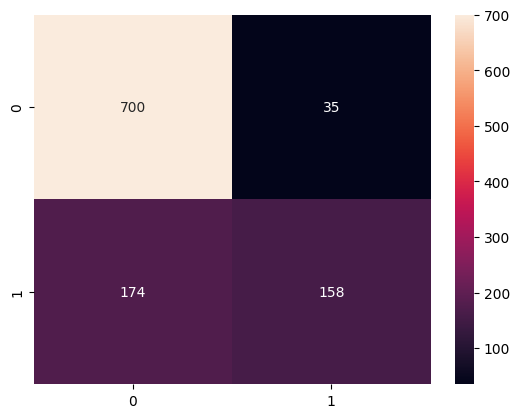

In [84]:
# fit classifier to training set
poly_svc=SVC(kernel='poly', C=1.0)
poly_svc.fit(X_train,Y_train)

# make predictions on test set
y_train_pred=poly_svc.predict(X_train)
model_scoret=poly_svc.score(X_train,Y_train)

print(poly_svc.score(X_train,Y_train))
print(confusion_matrix(poly_svc.predict(X_train),Y_train))
print(classification_report(y_train_pred,Y_train))
print(sns.heatmap(confusion_matrix(Y_train,y_train_pred),annot=True , fmt="2g"))

0.7685589519650655
[[318  96]
 [ 10  34]]
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       414
           1       0.26      0.77      0.39        44

    accuracy                           0.77       458
   macro avg       0.62      0.77      0.62       458
weighted avg       0.90      0.77      0.81       458

Axes(0.125,0.11;0.62x0.77)


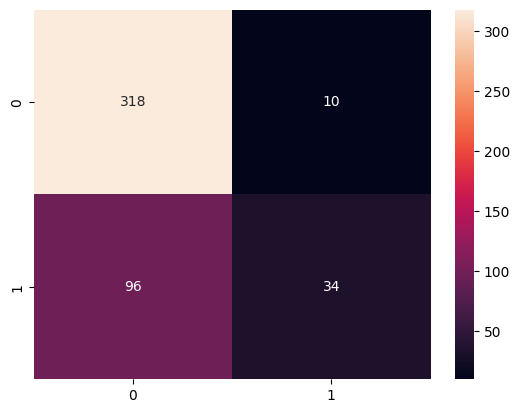

In [85]:
# fit classifier to training set
poly_svc=SVC(kernel='poly', C=1.0,probability=True)
poly_svc.fit(X_test,Y_test)

# make predictions on test set
y_test_pred=poly_svc.predict(X_test)
model_score=poly_svc.score(X_test,Y_test)
print(poly_svc.score(X_test,Y_test))
print(confusion_matrix(poly_svc.predict(X_test),Y_test))
print(classification_report(y_test_pred,Y_test))
print(sns.heatmap(confusion_matrix(Y_test,y_test_pred),annot=True , fmt="2g"))

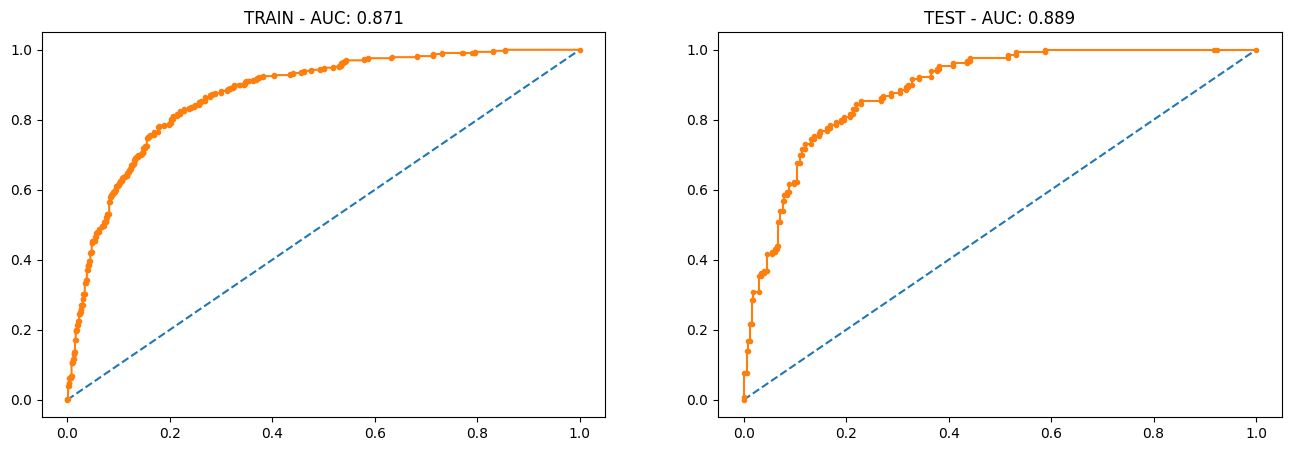

In [86]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
probs = poly_svc.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()


In [87]:
probst = poly_svc.predict_proba(X_train)
probst = probst[:, 1]
probs = poly_svc.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"SVM(Polykernel)",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table1=    final_table1.append(data_append,ignore_index=True)

<ipython-input-87-cf8b47779f5b>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table1=    final_table1.append(data_append,ignore_index=True)


***Model tunning: Bagging-Random Forest***

0.9662605435801312
[[726   9]
 [ 27 305]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       735
           1       0.97      0.92      0.94       332

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067

Axes(0.125,0.11;0.62x0.77)


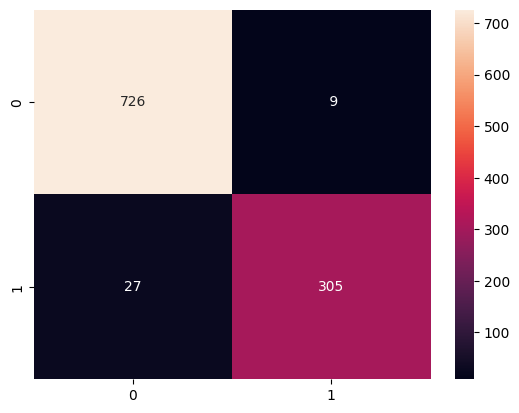

In [88]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import *
base=RandomForestClassifier()
bagging=BaggingClassifier(estimator=base,n_estimators=100, random_state=1)

bagging.fit(X_train,Y_train)

y_train_predict=bagging.predict(X_train)
print(bagging.score(X_train,Y_train))

model_scoret=bagging.score(X_train,Y_train)
print(confusion_matrix(Y_train,y_train_predict))
print(classification_report(Y_train,y_train_predict))
print(sns.heatmap(confusion_matrix(Y_train,y_train_predict),annot=True , fmt="2g"))

0.8362445414847162
[[291  37]
 [ 38  92]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       328
           1       0.71      0.71      0.71       130

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458

Axes(0.125,0.11;0.62x0.77)


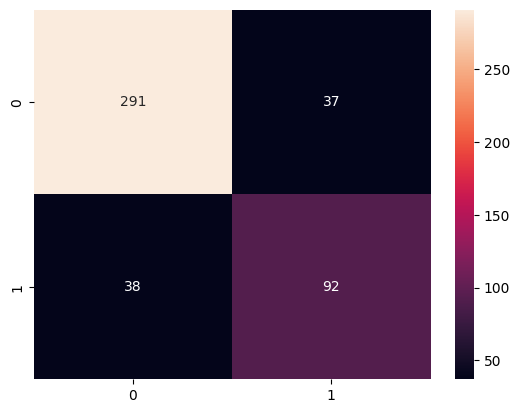

In [89]:
y_test_predict=bagging.predict(X_test)
model_score=bagging.score(X_test,Y_test)
print(bagging.score(X_test,Y_test))

print(confusion_matrix(Y_test,y_test_predict))
print(classification_report(Y_test,y_test_predict))
print(sns.heatmap(confusion_matrix(Y_test,y_test_predict),annot=True , fmt="2g"))


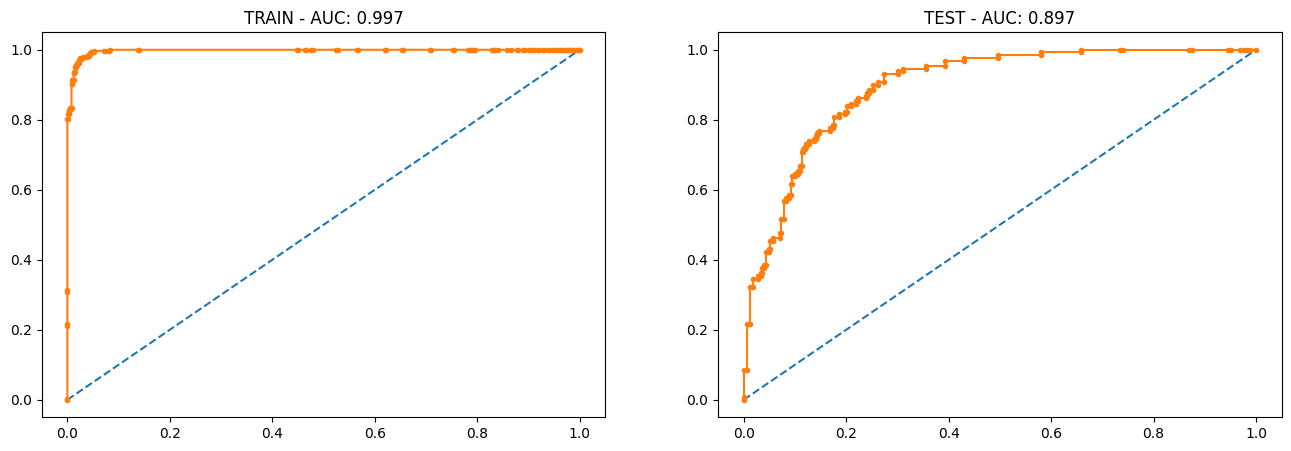

In [90]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
probs = bagging.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()

In [91]:
probst = bagging.predict_proba(X_train)
probst = probst[:, 1]
probs = bagging.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"RFBagging",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table1=    final_table1.append(data_append,ignore_index=True)

<ipython-input-91-c674dd61c258>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table1=    final_table1.append(data_append,ignore_index=True)


## ***Boosting***

***AdaBoost***

0.8472352389878163
[[666  69]
 [ 94 238]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       735
           1       0.78      0.72      0.74       332

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067

Axes(0.125,0.11;0.62x0.77)


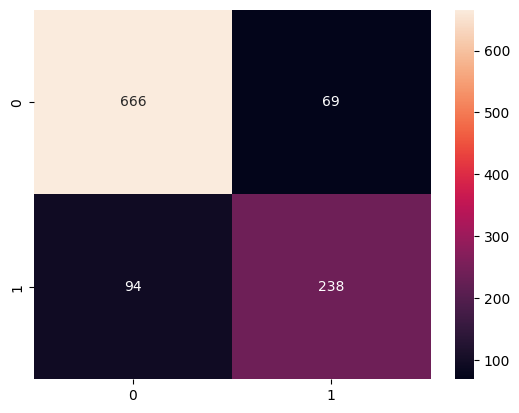

In [92]:
from sklearn.ensemble import AdaBoostClassifier
boost=AdaBoostClassifier(n_estimators=100,random_state=1)
boost.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)
y_train_predict=boost.predict(X_train)
model_scoret=boost.score(X_train,Y_train)
print(boost.score(X_train,Y_train))
print(confusion_matrix(Y_train,y_train_predict))
print(classification_report(Y_train,y_train_predict))
print(sns.heatmap(confusion_matrix(Y_train,y_train_predict),annot=True , fmt="2g"))


0.8187772925764192
[[285  43]
 [ 40  90]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       328
           1       0.68      0.69      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458

Axes(0.125,0.11;0.62x0.77)


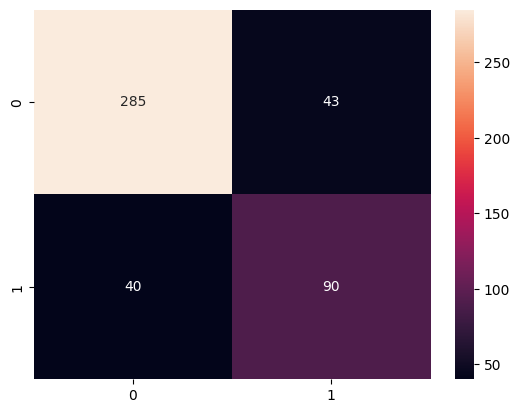

In [93]:

y_test_predict=boost.predict(X_test)
print(boost.score(X_test,Y_test))
model_score=boost.score(X_test,Y_test)
print(confusion_matrix(Y_test,y_test_predict))
print(classification_report(Y_test,y_test_predict))
print(sns.heatmap(confusion_matrix(Y_test,y_test_predict),annot=True , fmt="2g"))

In [94]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
probs = boost.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = boost.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()

In [95]:
probst = boost.predict_proba(X_train)
probst = probst[:, 1]
probs = boost.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"ADABoost",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table1=    final_table1.append(data_append,ignore_index=True)


<ipython-input-95-feb26c049679>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table1=    final_table1.append(data_append,ignore_index=True)


***Gradient Boost***

0.8865979381443299
[[684  51]
 [ 70 262]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       735
           1       0.84      0.79      0.81       332

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067

Axes(0.125,0.11;0.62x0.77)


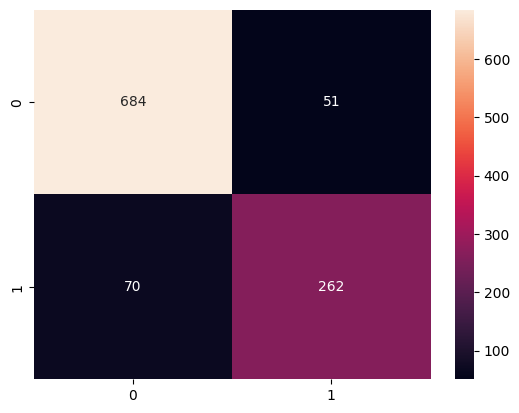

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=1)
gb.fit(X_train, Y_train)

y_train_predict=gb.predict(X_train)
model_scoret=gb.score(X_train,Y_train)
print(gb.score(X_train,Y_train))
print(confusion_matrix(Y_train,y_train_predict))
print(classification_report(Y_train,y_train_predict))
print(sns.heatmap(confusion_matrix(Y_train,y_train_predict),annot=True , fmt="2g"))


0.8318777292576419
[[285  43]
 [ 34  96]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       328
           1       0.69      0.74      0.71       130

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458

Axes(0.125,0.11;0.62x0.77)


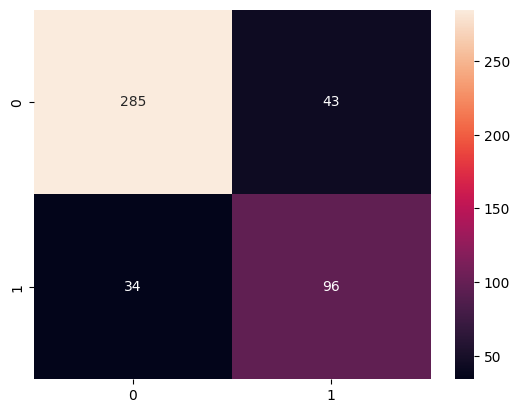

In [97]:

y_test_predict=gb.predict(X_test)
print(gb.score(X_test,Y_test))
model_score=gb.score(X_test,Y_test)
print(confusion_matrix(Y_test,y_test_predict))
print(classification_report(Y_test,y_test_predict))
print(sns.heatmap(confusion_matrix(Y_test,y_test_predict),annot=True , fmt="2g"))

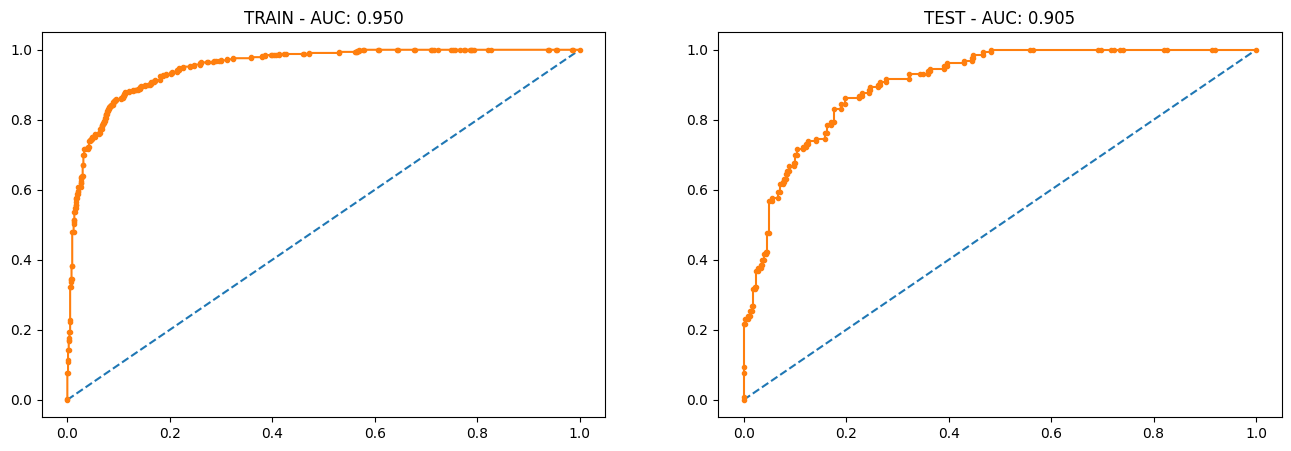

In [98]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
probs = gb.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()

In [99]:
probst = gb.predict_proba(X_train)
probst = probst[:, 1]
probs = gb.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"Gradient boost",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table1=    final_table1.append(data_append,ignore_index=True)

<ipython-input-99-5dd21ee9b816>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table1=    final_table1.append(data_append,ignore_index=True)


In [100]:
final_table1

Model:  Accuracy(train)  Accuracy(test)  AUC(Train)  AUC(Test)
0  Logistic Regression         0.839738        0.823144    0.889396   0.882481
1                  LDA         0.836926        0.834061    0.880852   0.898265
2                  KNN         0.858482        0.877729    0.811481   0.939564
3          Naive Bayes         0.833177        0.836245    0.882254   0.888884
4      SVM(Polykernel)         0.804124        0.768559    0.871480   0.864587
5            RFBagging         0.966261        0.836245    0.997084   0.896553
6             ADABoost         0.847235        0.818777    0.913292   0.879198
7       Gradient boost         0.886598        0.831878    0.950111   0.904526

**INFERENCE:**

* All the results of models is displayed in the table for data without scalling
* Also the performence of all models is good with slight difference.
* Based on accuracy: RF bagging's perfomence is better than others
* Based on AUC-ROC : Gradient boosting works well

Let's also look the performence after scaling

# Scale and Split

In [101]:
X=data.drop('vote',axis=1)
Y=data['vote']

In [102]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.70, random_state=1)

In [103]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(1067, 8)
(1067,)
(458, 8)
(458,)


In [104]:
scaler = MinMaxScaler()
#X_train['age']=X_train['age'].reshape(-1, 1)
X_train= scaler.fit_transform(X_train)
#X_train[0]

In [105]:
X_test=scaler.fit_transform(X_test)
#X_test[0]

***Logistic Regression***

In [106]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(tol=0.0001,max_iter=2000,random_state= 0)
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=2000, random_state=0)

MODEL SCORE: 0.8318777292576419
CONFUSION MATRIX:
 [[668  67]
 [106 226]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       735
           1       0.77      0.68      0.72       332

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067

Axes(0.125,0.11;0.62x0.77)


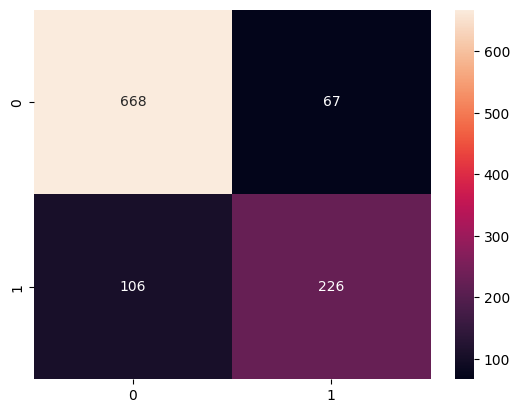

In [107]:
from sklearn.metrics import classification_report,confusion_matrix
model_scoret=lr.score(X_train, Y_train)
y_train_predict=lr.predict(X_train)
print("MODEL SCORE:",model_score)

print("CONFUSION MATRIX:\n",confusion_matrix(Y_train,y_train_predict))

print(classification_report(Y_train ,y_train_predict))

print(sns.heatmap(confusion_matrix(Y_train,y_train_predict),annot=True , fmt="2g"))

MODEL SCORE: 0.8209606986899564
CONFUSION MATRIX:
 [[292  36]
 [ 46  84]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       328
           1       0.70      0.65      0.67       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458

Axes(0.125,0.11;0.62x0.77)


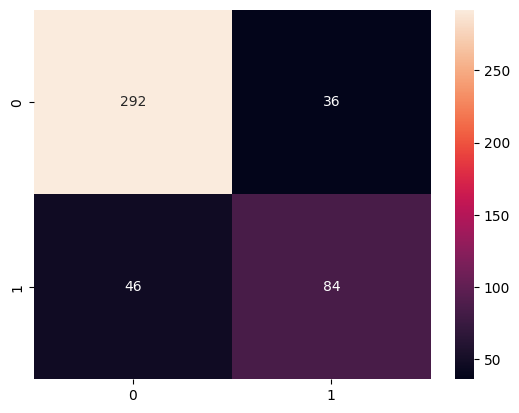

In [108]:
y_test_predict=lr.predict(X_test)
from sklearn.metrics import * #classification_report,confusion_matrix
model_score=lr.score(X_test, Y_test)
print("MODEL SCORE:",model_score)

print("CONFUSION MATRIX:\n",confusion_matrix(Y_test,y_test_predict))

print(classification_report(Y_test ,y_test_predict))

print(sns.heatmap(confusion_matrix(Y_test,y_test_predict),annot=True , fmt="2g"))

In [109]:
from sklearn.metrics import roc_auc_score,roc_curve

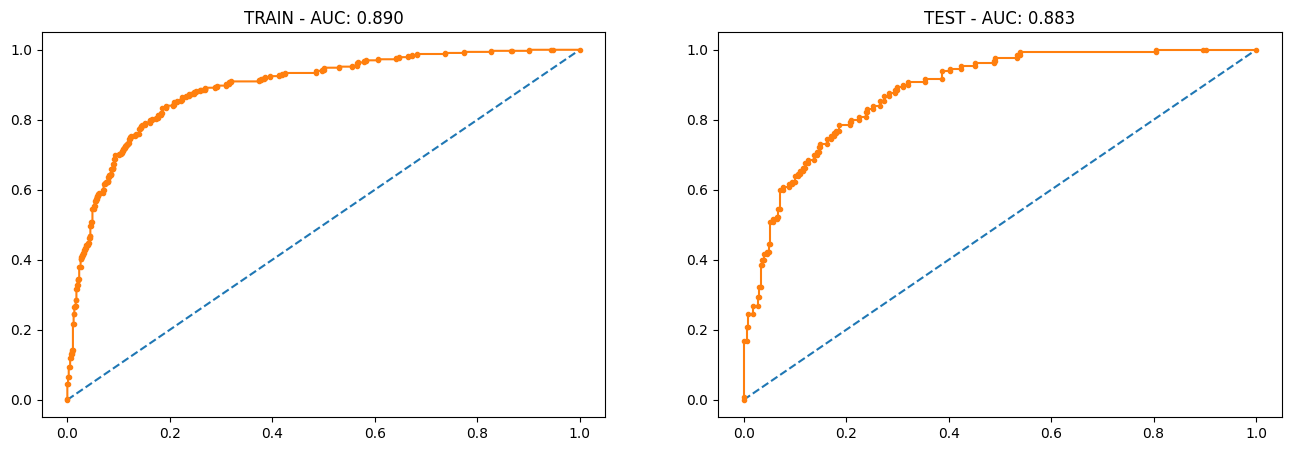

In [110]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
probs = lr.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()

In [111]:
probst = lr.predict_proba(X_train)
probst = probst[:, 1]
probs = lr.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"Log Reg",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table2=    final_table2.append(data_append,ignore_index=True)

#final_table2

<ipython-input-111-7ef06ae1ce56>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table2=    final_table2.append(data_append,ignore_index=True)


***LDA***

MODEL SCORE: 0.8369259606373008
[[660  99]
 [ 75 233]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       759
           1       0.70      0.76      0.73       308

    accuracy                           0.84      1067
   macro avg       0.80      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067

Axes(0.125,0.11;0.62x0.77)


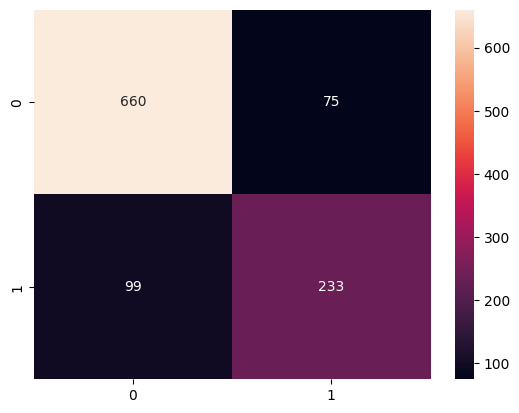

In [112]:
lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_train,Y_train)
y_train_predict=lda.predict(X_train)

model_scoret=lda.score(X_train, Y_train)
print("MODEL SCORE:",model_scoret)

print(confusion_matrix(lda.predict(X_train),Y_train))
print(classification_report(lda.predict(X_train),Y_train))

print(sns.heatmap(confusion_matrix(Y_train,y_train_predict),annot=True , fmt="2g"))

MODEL SCORE: 0.834061135371179
[[298  46]
 [ 30  84]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       344
           1       0.65      0.74      0.69       114

    accuracy                           0.83       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.84      0.83      0.84       458

Axes(0.125,0.11;0.62x0.77)


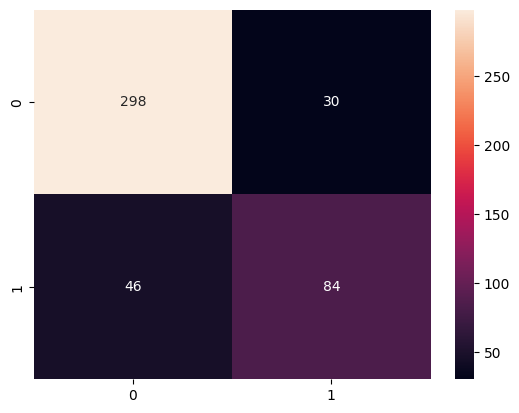

In [113]:
#lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_test,Y_test)
y_test_predict=lda.predict(X_test)

model_score=lda.score(X_test, Y_test)
print("MODEL SCORE:",model_score)

print(confusion_matrix(lda.predict(X_test),Y_test))
print(classification_report(lda.predict(X_test),Y_test))

print(sns.heatmap(confusion_matrix(Y_test,y_test_predict),annot=True , fmt="2g"))

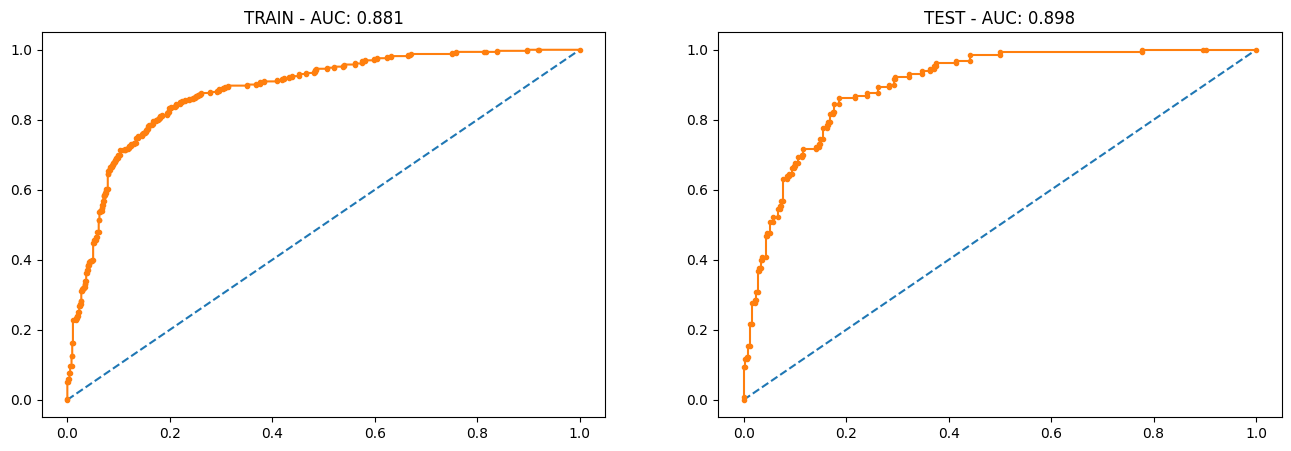

In [114]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
probs = lda.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()

In [115]:
probst = lda.predict_proba(X_train)
probst = probst[:, 1]
probs = lda.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"LDA",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table2=    final_table2.append(data_append,ignore_index=True)

#final_table2

<ipython-input-115-70d6d9b391e7>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table2=    final_table2.append(data_append,ignore_index=True)


***KNN***

0.865979381443299
[[672  80]
 [ 63 252]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       752
           1       0.76      0.80      0.78       315

    accuracy                           0.87      1067
   macro avg       0.84      0.85      0.84      1067
weighted avg       0.87      0.87      0.87      1067

Axes(0.125,0.11;0.62x0.77)


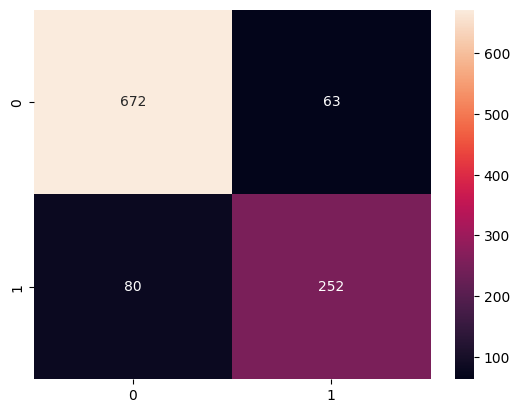

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn = knn.fit(X_train,Y_train)
pred_label= knn.predict(X_train)
model_scoret=knn.score(X_train,Y_train)
print(knn.score(X_train,Y_train))
print(confusion_matrix(knn.predict(X_train),Y_train))
print(classification_report(knn.predict(X_train),Y_train))

print(sns.heatmap(confusion_matrix(Y_train,pred_label),annot=True , fmt="2g"))

0.87117903930131
[[303  34]
 [ 25  96]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       337
           1       0.74      0.79      0.76       121

    accuracy                           0.87       458
   macro avg       0.83      0.85      0.84       458
weighted avg       0.87      0.87      0.87       458

Axes(0.125,0.11;0.62x0.77)


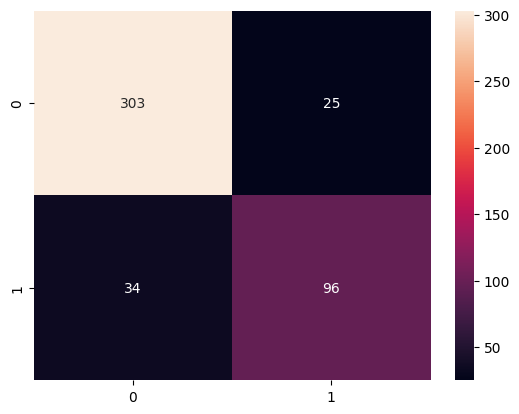

In [117]:
knn = knn.fit(X_test,Y_test)
pred_label= knn.predict(X_test)
model_score=knn.score(X_test,Y_test)
print(knn.score(X_test,Y_test))
print(confusion_matrix(knn.predict(X_test),Y_test))
print(classification_report(knn.predict(X_test),Y_test))

print(sns.heatmap(confusion_matrix(Y_test,pred_label),annot=True , fmt="2g"))

In [118]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
probs = knn.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()

In [119]:
probst = knn.predict_proba(X_train)
probst = probst[:, 1]
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"KNN",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table2=    final_table2.append(data_append,ignore_index=True)

#final_table2

<ipython-input-119-77a7f409c45a>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table2=    final_table2.append(data_append,ignore_index=True)


***Naive Bayes***

0.8331771321462043
[[649  92]
 [ 86 240]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       741
           1       0.72      0.74      0.73       326

    accuracy                           0.83      1067
   macro avg       0.80      0.81      0.80      1067
weighted avg       0.83      0.83      0.83      1067

Axes(0.125,0.11;0.62x0.77)


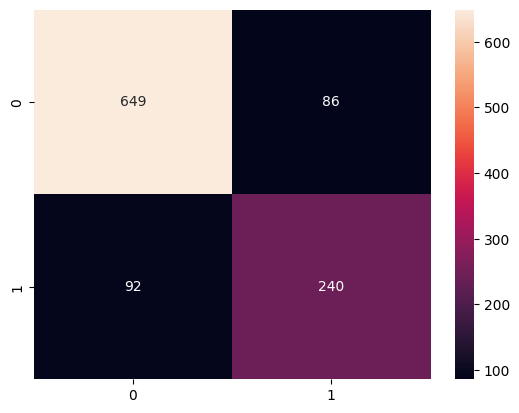

In [120]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb= nb.fit(X_train, Y_train)
model_scoret=nb.score(X_train,Y_train)
print(nb.score(X_train,Y_train))
print(confusion_matrix(nb.predict(X_train),Y_train))
print(classification_report(nb.predict(X_train),Y_train))
print(sns.heatmap(confusion_matrix(Y_train,nb.predict(X_train)),annot=True , fmt="2g"))

In [121]:
nb= nb.fit(X_test, Y_test)
print(nb.score(X_test,Y_test))
model_scoret=nb.score(X_test,Y_test)
print(confusion_matrix(nb.predict(X_test),Y_test))
print(classification_report(nb.predict(X_test),Y_test))
print(sns.heatmap(confusion_matrix(Y_test,nb.predict(X_test)),annot=True , fmt="2g"))

0.8362445414847162
[[292  39]
 [ 36  91]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       331
           1       0.70      0.72      0.71       127

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458

Axes(0.125,0.11;0.62x0.77)


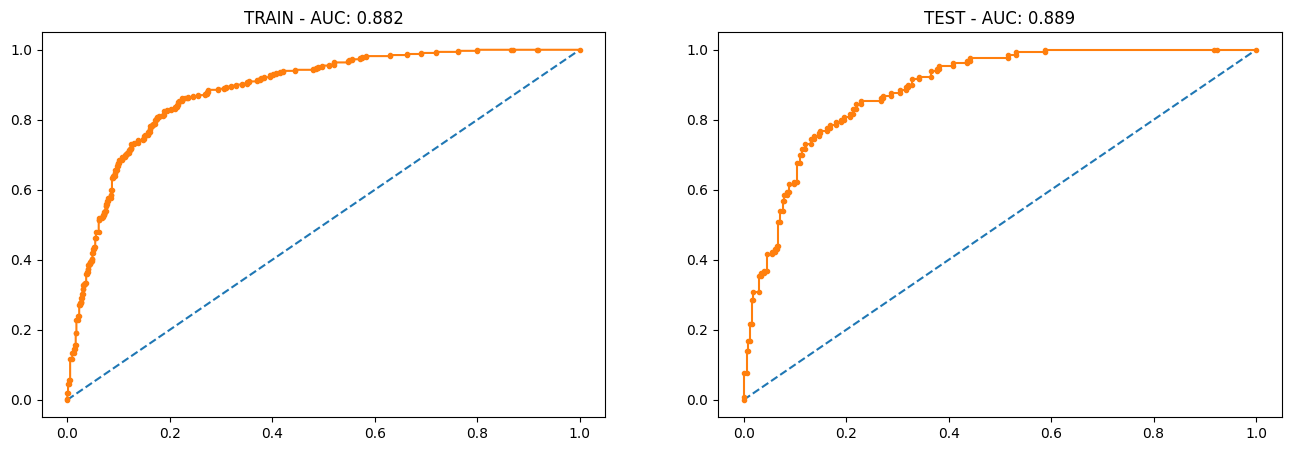

In [122]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
probs = nb.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()

In [123]:
probst = nb.predict_proba(X_train)
probst = probst[:, 1]
probs = nb.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"NB",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table2=    final_table2.append(data_append,ignore_index=True)

#final_table2

<ipython-input-123-7951c08241a8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table2=    final_table2.append(data_append,ignore_index=True)


***SVM***

0.8603561387066542
[[682  96]
 [ 53 236]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       778
           1       0.71      0.82      0.76       289

    accuracy                           0.86      1067
   macro avg       0.82      0.85      0.83      1067
weighted avg       0.87      0.86      0.86      1067

Axes(0.125,0.11;0.62x0.77)


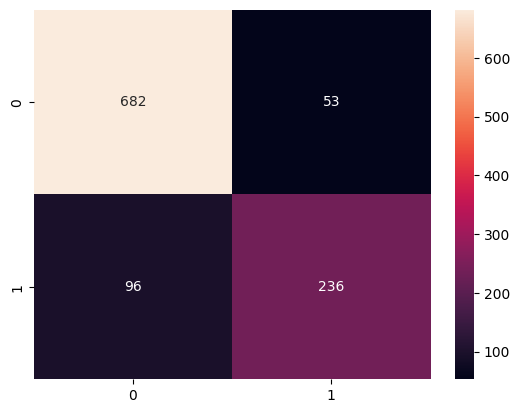

In [124]:
svc=SVC()
# fit classifier to training set
svm=svc.fit(X_train,Y_train)

# make predictions on test set
y_train_pred=svm.predict(X_train)

print(svm.score(X_train,Y_train))
print(confusion_matrix(svm.predict(X_train),Y_train))
print(classification_report(y_train_pred,Y_train))
print(sns.heatmap(confusion_matrix(Y_train,y_train_pred),annot=True , fmt="2g"))

***SVM with polynomial kernel***

0.8584817244611059
[[680  96]
 [ 55 236]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       776
           1       0.71      0.81      0.76       291

    accuracy                           0.86      1067
   macro avg       0.82      0.84      0.83      1067
weighted avg       0.87      0.86      0.86      1067

Axes(0.125,0.11;0.62x0.77)


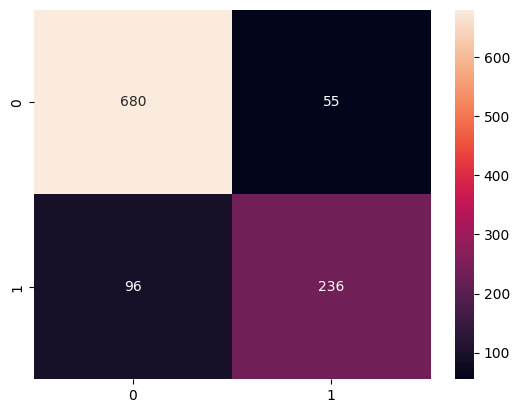

In [125]:
# fit classifier to training set
poly_svc=SVC(kernel='poly', C=1.0)
poly_svc.fit(X_train,Y_train)

# make predictions on test set
y_train_pred=poly_svc.predict(X_train)
model_scoret=poly_svc.score(X_train,Y_train)
print(poly_svc.score(X_train,Y_train))
print(confusion_matrix(poly_svc.predict(X_train),Y_train))
print(classification_report(y_train_pred,Y_train))
print(sns.heatmap(confusion_matrix(Y_train,y_train_pred),annot=True , fmt="2g"))

0.8973799126637555
[[308  27]
 [ 20 103]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       335
           1       0.79      0.84      0.81       123

    accuracy                           0.90       458
   macro avg       0.87      0.88      0.87       458
weighted avg       0.90      0.90      0.90       458

Axes(0.125,0.11;0.62x0.77)


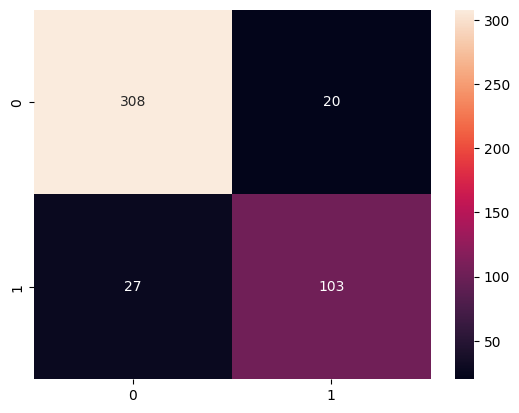

In [126]:
# fit classifier to training set
poly_svc=SVC(kernel='poly', C=1.0,probability=True)
poly_svc.fit(X_test,Y_test)

# make predictions on test set
y_test_pred=poly_svc.predict(X_test)
model_score=poly_svc.score(X_test,Y_test)
print(poly_svc.score(X_test,Y_test))
print(confusion_matrix(poly_svc.predict(X_test),Y_test))
print(classification_report(y_test_pred,Y_test))
print(sns.heatmap(confusion_matrix(Y_test,y_test_pred),annot=True , fmt="2g"))

In [127]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
probs = poly_svc.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()

In [128]:
probst = poly_svc.predict_proba(X_train)
probst = probst[:, 1]
probs = poly_svc.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"SVM",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table2=    final_table2.append(data_append,ignore_index=True)

#final_table2

<ipython-input-128-e24b814551d8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table2=    final_table2.append(data_append,ignore_index=True)


***RandomForest:Bagging***

In [129]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import *

In [130]:
base=RandomForestClassifier()
bagging=BaggingClassifier(estimator=base,n_estimators=100, random_state=1)

bagging.fit(X_train,Y_train)

BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

0.9662605435801312
[[726   9]
 [ 27 305]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       735
           1       0.97      0.92      0.94       332

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067

Axes(0.125,0.11;0.62x0.77)


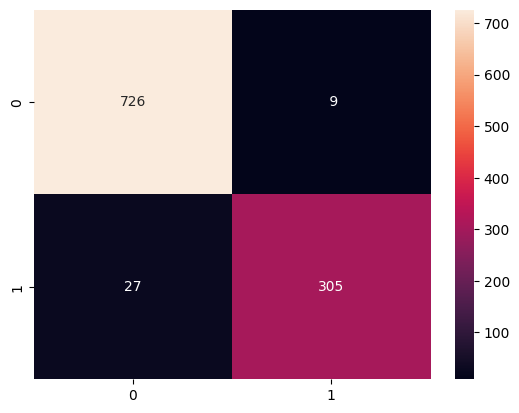

In [131]:
y_train_predict=bagging.predict(X_train)
print(bagging.score(X_train,Y_train))
model_scoret=bagging.score(X_train,Y_train)
print(confusion_matrix(Y_train,y_train_predict))
print(classification_report(Y_train,y_train_predict))
print(sns.heatmap(confusion_matrix(Y_train,y_train_predict),annot=True , fmt="2g"))

0.834061135371179
[[291  37]
 [ 39  91]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       328
           1       0.71      0.70      0.71       130

    accuracy                           0.83       458
   macro avg       0.80      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458

Axes(0.125,0.11;0.62x0.77)


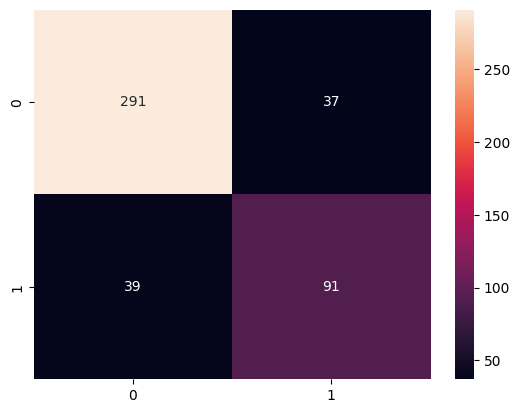

In [132]:
y_test_predict=bagging.predict(X_test)
print(bagging.score(X_test,Y_test))
model_score=bagging.score(X_test,Y_test)
print(confusion_matrix(Y_test,y_test_predict))
print(classification_report(Y_test,y_test_predict))
print(sns.heatmap(confusion_matrix(Y_test,y_test_predict),annot=True , fmt="2g"))

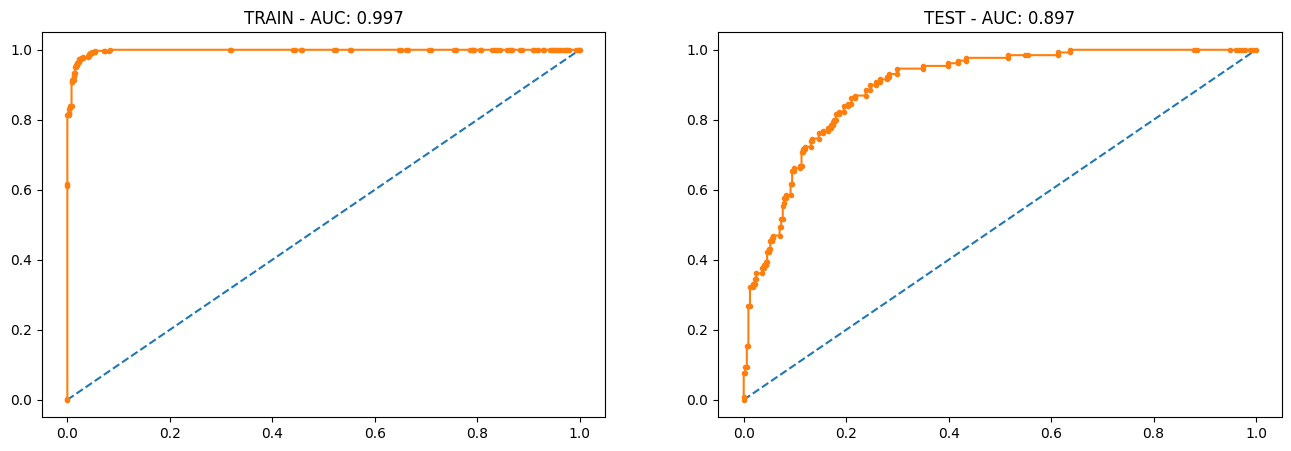

In [133]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
probs = bagging.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()

In [134]:
probst = bagging.predict_proba(X_train)
probst = probst[:, 1]
probs = bagging.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"RFBagging",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table2=    final_table2.append(data_append,ignore_index=True)

#final_table2

<ipython-input-134-c6761ee6e5f6>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table2=    final_table2.append(data_append,ignore_index=True)


# ***BOOSTING***

***AdaBoost***

0.8472352389878163
[[666  69]
 [ 94 238]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       735
           1       0.78      0.72      0.74       332

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067

Axes(0.125,0.11;0.62x0.77)


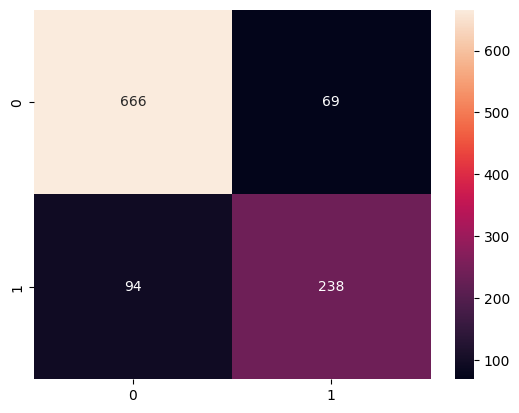

In [135]:
from sklearn.ensemble import AdaBoostClassifier
boost=AdaBoostClassifier(n_estimators=100,random_state=1)
boost.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)
y_train_predict=boost.predict(X_train)
model_scoret=boost.score(X_train,Y_train)
print(boost.score(X_train,Y_train))
print(confusion_matrix(Y_train,y_train_predict))
print(classification_report(Y_train,y_train_predict))
print(sns.heatmap(confusion_matrix(Y_train,y_train_predict),annot=True , fmt="2g"))

0.8122270742358079
[[283  45]
 [ 41  89]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       328
           1       0.66      0.68      0.67       130

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458

Axes(0.125,0.11;0.62x0.77)


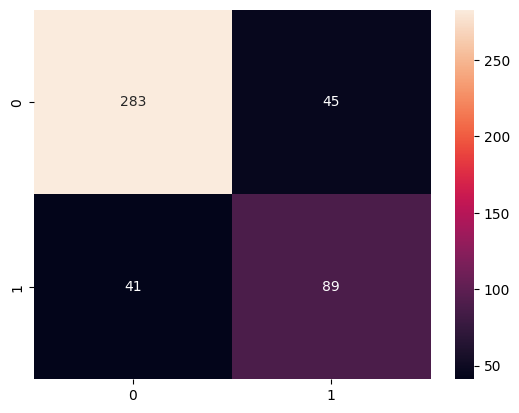

In [136]:
y_test_predict=boost.predict(X_test)
print(boost.score(X_test,Y_test))
model_score=boost.score(X_test,Y_test)
print(confusion_matrix(Y_test,y_test_predict))
print(classification_report(Y_test,y_test_predict))
print(sns.heatmap(confusion_matrix(Y_test,y_test_predict),annot=True , fmt="2g"))

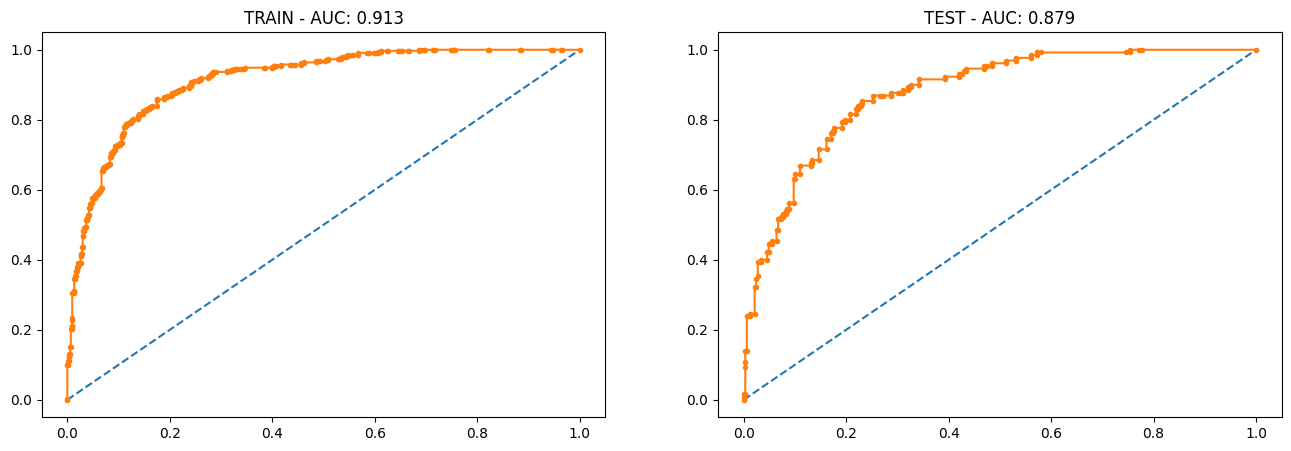

In [137]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
probs = boost.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = boost.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()

In [138]:
probst = boost.predict_proba(X_train)
probst = probst[:, 1]
probs = boost.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"AdaBoost",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table2=    final_table2.append(data_append,ignore_index=True)

#final_table2

<ipython-input-138-9af6ae9d6dcf>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table2=    final_table2.append(data_append,ignore_index=True)


***GradientBoost***

0.8865979381443299
[[684  51]
 [ 70 262]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       735
           1       0.84      0.79      0.81       332

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067

Axes(0.125,0.11;0.62x0.77)


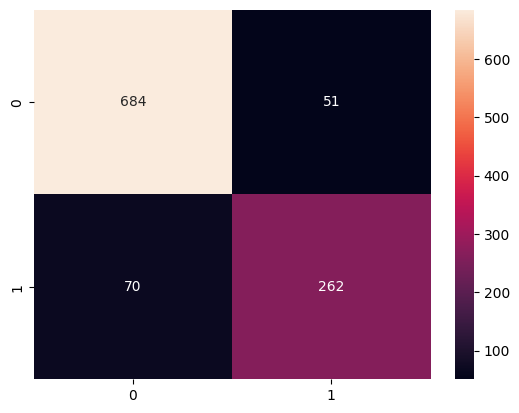

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=1)
gb.fit(X_train, Y_train)

y_train_predict=gb.predict(X_train)
model_scoret=gb.score(X_train,Y_train)
print(gb.score(X_train,Y_train))
print(confusion_matrix(Y_train,y_train_predict))
print(classification_report(Y_train,y_train_predict))
print(sns.heatmap(confusion_matrix(Y_train,y_train_predict),annot=True , fmt="2g"))

0.834061135371179
[[286  42]
 [ 34  96]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       328
           1       0.70      0.74      0.72       130

    accuracy                           0.83       458
   macro avg       0.79      0.81      0.80       458
weighted avg       0.84      0.83      0.84       458

Axes(0.125,0.11;0.62x0.77)


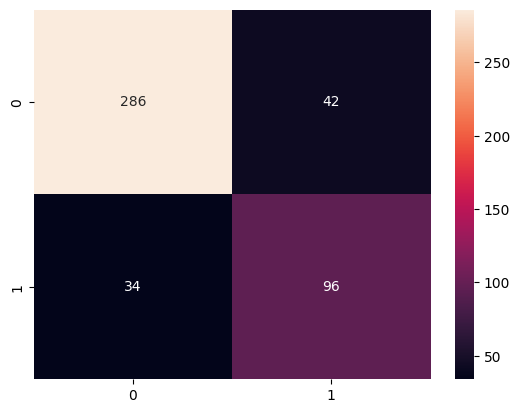

In [140]:
y_test_predict=gb.predict(X_test)
print(gb.score(X_test,Y_test))
model_score=gb.score(X_test,Y_test)
print(confusion_matrix(Y_test,y_test_predict))
print(classification_report(Y_test,y_test_predict))
print(sns.heatmap(confusion_matrix(Y_test,y_test_predict),annot=True , fmt="2g"))


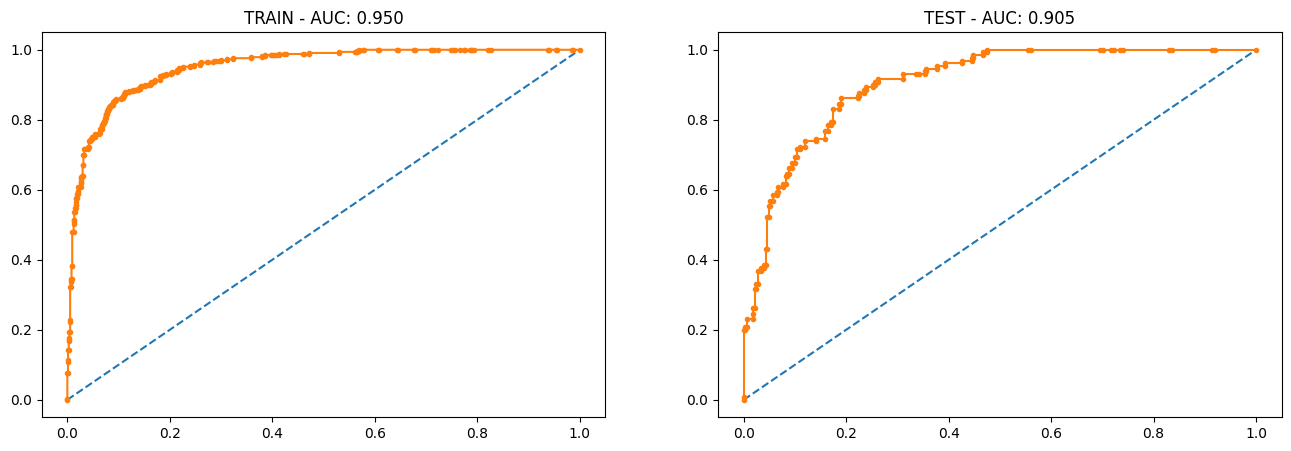

In [141]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
probs = gb.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, probs)
plt.title("TRAIN - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

plt.subplot(1,2,2)
probs = gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
plt.title("TEST - AUC: %.3f" % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
#plt.show()

plt.show()


In [142]:
probst = gb.predict_proba(X_train)
probst = probst[:, 1]
probs = gb.predict_proba(X_test)
probs = probs[:, 1]
auct=roc_auc_score(Y_train, probst)
auc=roc_auc_score(Y_test, probs)
data_append={"Model:":"GradientBoost",
             "Accuracy(train)":model_scoret,
             "Accuracy(test)":model_score,
             "AUC(Train)" :auct,
             "AUC(Test)" :auc
             }
final_table2=    final_table2.append(data_append,ignore_index=True)

#final_table2

<ipython-input-142-e3aa9b6f9259>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_table2=    final_table2.append(data_append,ignore_index=True)


In [143]:
final_table2

Model:  Accuracy(train)  Accuracy(test)  AUC(Train)  AUC(Test)
0        Log Reg         0.837863        0.820961    0.889597   0.882575
1            LDA         0.836926        0.834061    0.880840   0.898265
2            KNN         0.865979        0.871179    0.855715   0.936609
3             NB         0.836245        0.871179    0.882217   0.888884
4            SVM         0.858482        0.897380    0.860825   0.951161
5      RFBagging         0.966261        0.834061    0.997086   0.897338
6       AdaBoost         0.847235        0.812227    0.913292   0.879315
7  GradientBoost         0.886598        0.834061    0.950111   0.905019

**INFERENCE:**

The performence of the models after perfroming scaling looks quite similar with slight difference


***COMPARSION ON OBTAINED RESULTS***

In [144]:
final_table1#before scaling

Model:  Accuracy(train)  Accuracy(test)  AUC(Train)  AUC(Test)
0  Logistic Regression         0.839738        0.823144    0.889396   0.882481
1                  LDA         0.836926        0.834061    0.880852   0.898265
2                  KNN         0.858482        0.877729    0.811481   0.939564
3          Naive Bayes         0.833177        0.836245    0.882254   0.888884
4      SVM(Polykernel)         0.804124        0.768559    0.871480   0.864587
5            RFBagging         0.966261        0.836245    0.997084   0.896553
6             ADABoost         0.847235        0.818777    0.913292   0.879198
7       Gradient boost         0.886598        0.831878    0.950111   0.904526

In [145]:
final_table2#after Scaling

Model:  Accuracy(train)  Accuracy(test)  AUC(Train)  AUC(Test)
0        Log Reg         0.837863        0.820961    0.889597   0.882575
1            LDA         0.836926        0.834061    0.880840   0.898265
2            KNN         0.865979        0.871179    0.855715   0.936609
3             NB         0.836245        0.871179    0.882217   0.888884
4            SVM         0.858482        0.897380    0.860825   0.951161
5      RFBagging         0.966261        0.834061    0.997086   0.897338
6       AdaBoost         0.847235        0.812227    0.913292   0.879315
7  GradientBoost         0.886598        0.834061    0.950111   0.905019

**INFERENCE:**

So best optimized model by comparing both the results and looking into other performence metrics like confusion matrix, specificity,recall the below models performs well.

* BEFORE SCALING:
RFBagging and KNN performs well

* AFTER SCALING:
RFBagging,Gradient Boost and SVM performs well



---


# **INSIGHTS**

* As Bagging with RandomForest works well for both scaled and not scaled data it can be concluded that the model results in best optimized performence.

* The Labour Party is performing far better than the Conservatives.

* The number of female voters is higher than the number of male voters.

* People with stronger natioanl economic conditions tend to vote for the Labour party.

* Conservative party supporters who have more anti-European views are more likely to vote for them.

* Conservative Party votes came from those with more political  knowledge.



---



# **PROBLEM 2**

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
*   President Franklin D. Roosevelt in 1941
*   President John F. Kennedy in 1961
*   President Richard Nixon in 1963

•	Find the number of characters, words and sentences for the mentioned documents. – 3 Marks

•	Remove all the stopwords from all the three speeches. – 3 Marks

•	Which word occurs the most number of times in his inaugural address for each
president? Mention the top three words. (after removing the stopwords) – 3 Marks

•	Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks

---

**Download and import neccessary packages and load the dataset**

In [146]:
import nltk
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [147]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [148]:
data1=inaugural.raw('1941-Roosevelt.txt')
#data1
data2=inaugural.raw('1961-Kennedy.txt')
#data2
data3=inaugural.raw('1969-Nixon.txt')
#data3
data4=inaugural.raw('1973-Nixon.txt')
#data4

**Find the number of characters, words and sentences for the mentioned documents. – 3 Marks**

In [149]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

***Import required packages***

In [150]:
from nltk import sent_tokenize
from nltk import word_tokenize

***Store the data into dictionary with name of president as key and the respective speech as value***

In [151]:
data_speech = {
    "Roosevelt-1941": data1,
    "Kennedy-1961": data2,
    "Nixon-1969": data3,
    "Nixon-1973": data4
}
#type(data_speech)
#data_speech

In [152]:
def in_task1(data):
  characters=len(data)
  print("NO.OF.CHARACTERS:",characters)

  #word tokenize
  words=word_tokenize(data)
  print("NO.OF.WORDS:",len(words))

  #sentence tokenize
  sentences=sent_tokenize(data)
  print("NO.OF.SENTENCES:",len(sentences))

In [153]:
print("Number of characters, words and sentences for the mentioned documents\n")
for president, data in data_speech.items():
  print("PRESIDENT:",president)
  in_task1(data)
  print("\n")

Number of characters, words and sentences for the mentioned documents

PRESIDENT: Roosevelt-1941
NO.OF.CHARACTERS: 7571
NO.OF.WORDS: 1526
NO.OF.SENTENCES: 68


PRESIDENT: Kennedy-1961
NO.OF.CHARACTERS: 7618
NO.OF.WORDS: 1543
NO.OF.SENTENCES: 52


PRESIDENT: Nixon-1969
NO.OF.CHARACTERS: 11624
NO.OF.WORDS: 2423
NO.OF.SENTENCES: 103


PRESIDENT: Nixon-1973
NO.OF.CHARACTERS: 9991
NO.OF.WORDS: 2006
NO.OF.SENTENCES: 68






---


**Remove all the stopwords from all the three speeches. – 3 Marks**

***Load the package and download the stopwords***

In [154]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
#print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [155]:
# Create a set of stop words
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from a sentence
def in_task2(sentence):
  removed_stopwords = []
  cleaned_words = []

  # Split the sentence into individual words
  words = nltk.word_tokenize(sentence)
  for word in words:
    if word.lower() in stop_words:
        removed_stopwords.append(word)
    else:
        cleaned_words.append(word)

  #print("Original Sentence:")  #print(sentence)

  print("\nCleaned Sentence:")
  cleaned_sentence = " ".join(cleaned_words)
  print(cleaned_sentence)
  print("\nRemoved Stopwords:")
  print(removed_stopwords)#," ",len(removed_stopwords))
  return cleaned_sentence

In [156]:
data_speech_clean={}
print("Remove all the stopwords from all the three speeches\n")
for president, data in data_speech.items():
  print("PRESIDENT:",president) #name of president
  res=in_task2(data)
  data_speech_clean[president] = res #storing cleaned sentences(after removing stopwords) into dictionary with respective president name as key
  print("\n")

Remove all the stopwords from all the three speeches

PRESIDENT: Roosevelt-1941

Cleaned Sentence:
national day inauguration since 1789 , people renewed sense dedication United States . Washington 's day task people create weld together nation . Lincoln 's day task people preserve Nation disruption within . day task people save Nation institutions disruption without . us come time , midst swift happenings , pause moment take stock -- recall place history , rediscover may . , risk real peril inaction . Lives nations determined count years , lifetime human spirit . life man three-score years ten : little , little less . life nation fullness measure live . men doubt . men believe democracy , form Government frame life , limited measured kind mystical artificial fate , unexplained reason , tyranny slavery become surging wave future -- freedom ebbing tide . Americans know true . Eight years ago , life Republic seemed frozen fatalistic terror , proved true . midst shock -- acted . acted quic

***Printing the cleaned dictionary***

In [157]:
for president, cleaned_speech in data_speech_clean.items():
    print("\nCleaned Speech for", president, ":\n", cleaned_speech)


Cleaned Speech for Roosevelt-1941 :
 national day inauguration since 1789 , people renewed sense dedication United States . Washington 's day task people create weld together nation . Lincoln 's day task people preserve Nation disruption within . day task people save Nation institutions disruption without . us come time , midst swift happenings , pause moment take stock -- recall place history , rediscover may . , risk real peril inaction . Lives nations determined count years , lifetime human spirit . life man three-score years ten : little , little less . life nation fullness measure live . men doubt . men believe democracy , form Government frame life , limited measured kind mystical artificial fate , unexplained reason , tyranny slavery become surging wave future -- freedom ebbing tide . Americans know true . Eight years ago , life Republic seemed frozen fatalistic terror , proved true . midst shock -- acted . acted quickly , boldly , decisively . later years living years -- fruit

In [158]:
print("Number of characters, words and sentences for the mentioned documents\n")
for president, data in data_speech_clean.items():
  print("PRESIDENT:",president)
  in_task1(data)
  print("\n")

Number of characters, words and sentences for the mentioned documents

PRESIDENT: Roosevelt-1941
NO.OF.CHARACTERS: 4967
NO.OF.WORDS: 808
NO.OF.SENTENCES: 68


PRESIDENT: Kennedy-1961
NO.OF.CHARACTERS: 5122
NO.OF.WORDS: 862
NO.OF.SENTENCES: 52


PRESIDENT: Nixon-1969
NO.OF.CHARACTERS: 7614
NO.OF.WORDS: 1303
NO.OF.SENTENCES: 103


PRESIDENT: Nixon-1973
NO.OF.CHARACTERS: 6375
NO.OF.WORDS: 1035
NO.OF.SENTENCES: 68






---


**Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks**

In [159]:
from nltk.probability import FreqDist
import string

def get_most_common_words(sentence,n):
    cleaned_words = []
    words = nltk.word_tokenize(sentence)
    #words_without_punctuation = [word for word in words if word.isalpha()]

    for word in words:
      cleaned_words.append(word)

    # Calculate the most common words
    freq_dist = FreqDist(cleaned_words)

    most_common_words = freq_dist.most_common()

    most_3_words=freq_dist.most_common(n)

    return most_common_words,most_3_words


top_words_by_president = {}
top_3_words={}
for president, data in data_speech_clean.items():
    print("PRESIDENT:", president)
    top_words ,top_3= get_most_common_words(data,6)
    top_words_by_president[president] = top_words
    top_3_words=top_3
    print("Top Words:", top_words)
    print("Top 3 words",top_3_words)
    print("\n")

PRESIDENT: Roosevelt-1941
Top Words: [(',', 77), ('.', 68), ('--', 25), ('know', 10), ('spirit', 9), ('life', 9), ('us', 8), ('democracy', 8), ('people', 7), ('Nation', 7), ('America', 7), ('years', 6), ('freedom', 6), ("'s", 5), ('nation', 5), ('human', 5), ('men', 5), ('body', 5), ('mind', 5), ('speaks', 5), ('day', 4), ('States', 4), (';', 4), ('must', 4), ('something', 4), ('faith', 4), ('United', 3), ('task', 3), ('within', 3), ('history', 3), ('nations', 3), ('live', 3), ('future', 3), ('new', 3), ('free', 3), ('alone', 3), ('still', 3), ('every', 3), ('continent', 3), ('like', 3), ('person', 3), ('sacred', 3), ('came', 3), ('first', 3), ('destiny', 3), ('national', 2), ('1789', 2), ('sense', 2), ('Washington', 2), ('create', 2), ('together', 2), ('disruption', 2), ('come', 2), ('time', 2), ('midst', 2), ('stock', 2), ('may', 2), (':', 2), ('little', 2), ('measure', 2), ('doubt', 2), ('Government', 2), ('measured', 2), ('Americans', 2), ('true', 2), ('Republic', 2), ('acted', 2),

**NOTE:**

Since the top 3 frequent words are special characters,top 6 are displayed

---

**Plot the word cloud of each of the speeches of the variable. (after removing
the stopwords) – 3 Marks**

President Roosevelt-1941:


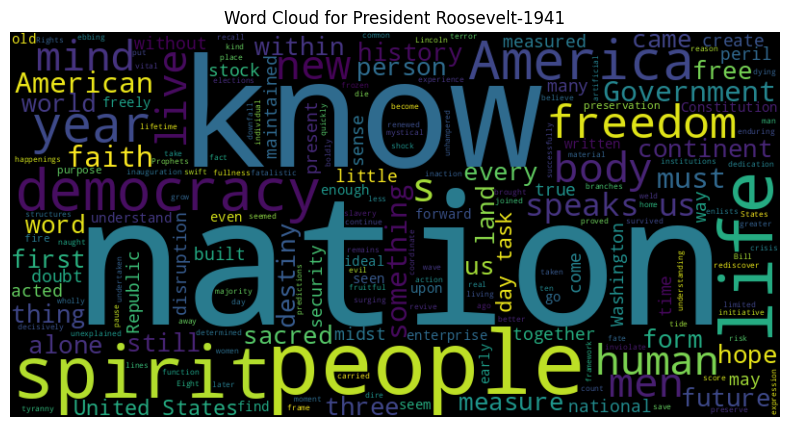

President Kennedy-1961:


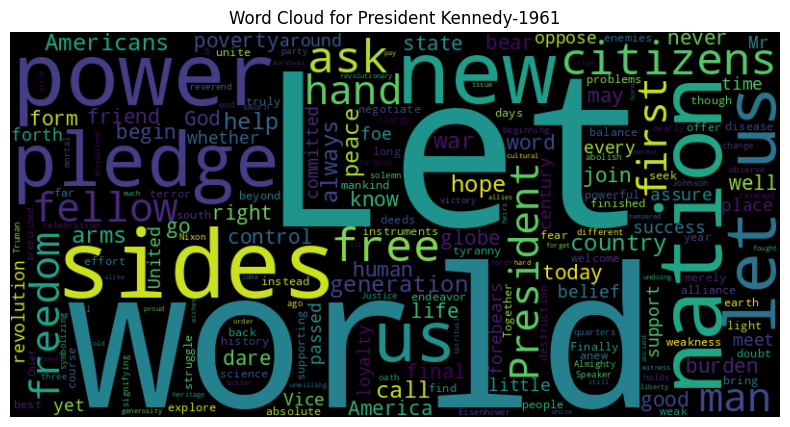

President Nixon-1969:


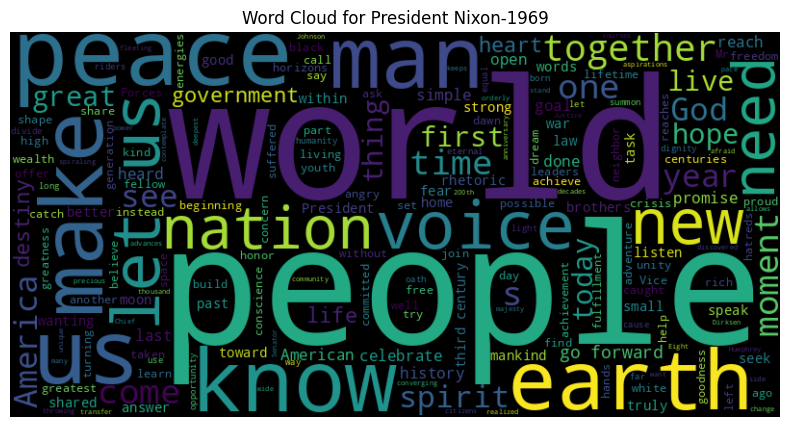

President Nixon-1973:


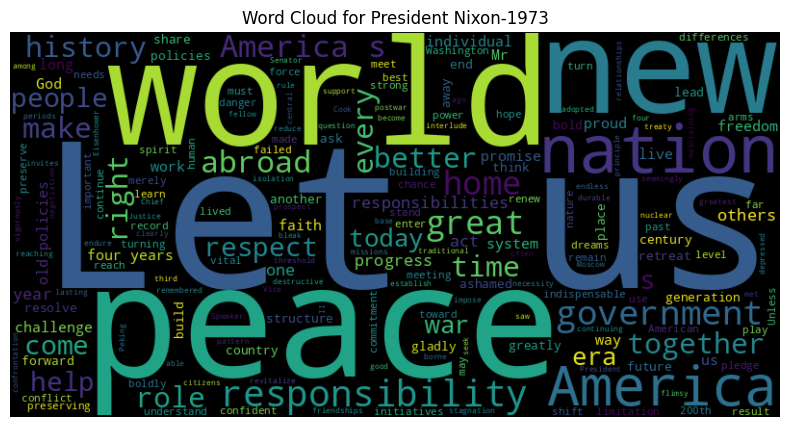

In [160]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for president, data in data_speech_clean.items():
  words = word_tokenize(data)
  print(f"President {president}:")
  # Plot word cloud
  wordcloud = WordCloud(width=800, height=400).generate(" ".join(words))
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title(f"Word Cloud for President {president}")
  plt.show()